# Churn Practice - Juan Carlos Juárez

In [ ]:
#Libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# Importing the data
data = pd.read_csv('C:/Users/juanc/PycharmProjects/AIMachine/practice_03_churn_dataset.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn_1_month,churn_2_month,churn_3_month
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,No,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,No,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,No,No,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,No,No,Yes


## Encoding Categorical variables

In [3]:
# checking the numerical and categorical columns

# numerical columns:
print('\nnumerical variables:\n')
for c, t in zip(data.columns, data.dtypes):
    if t in ['int64', 'float64']:
        print(c)
        
# categorical columns:
print('\ncategorical variables:\n')
for c, t in zip(data.columns, data.dtypes):
    if t not in ['int64', 'float64']:
        print(c)


numerical variables:

SeniorCitizen
tenure
MonthlyCharges
TotalCharges

categorical variables:

customerID
gender
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
churn_1_month
churn_2_month
churn_3_month


In [4]:
# cleaning categorical features
vars_cat= ["MultipleLines","OnlineSecurity","OnlineBackup","OnlineSecurity","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]

yes_no = {"No internet service":"No","No phone service":"No"}

for i in vars_cat:
    data[i]=data[i].replace(yes_no)


In [5]:
data["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [6]:
# cleaning categorical features
vars_cat2= ["InternetService"]

yes_no = {"DSL":"Yes","Fiber optic":"Yes"}

for i in vars_cat2:
    data[i]=data[i].replace(yes_no)


In [7]:
# Encoding some categorical columns 

vars_categorical = ["churn_1_month","churn_2_month","churn_3_month","Partner","Dependents","PhoneService","OnlineSecurity","StreamingTV","StreamingMovies","PaperlessBilling","OnlineBackup","DeviceProtection","TechSupport","InternetService","MultipleLines"]

yes_no = {'Yes':1,'No':0}

for i in vars_categorical:
    data[i]=data[i].replace(yes_no)


In [8]:
#Encoding Gender feature
vars_cat3 = ["gender"]
yes_no2 = {'Female':1,'Male':0}

for i in vars_cat3:
    data[i]=data[i].replace(yes_no2)

In [9]:
data["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [10]:
# Encoding Contract

vars_cat4 = ["Contract"]
yes_no3 = {'Month-to-month':0,'One year':1,'Two year':2}

for i in vars_cat4:
    data[i]=data[i].replace(yes_no3)

In [11]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn_1_month,churn_2_month,churn_3_month
0,7590-VHVEG,1,0,1,0,1,0,0,1,0,...,0,0,0,1,Electronic check,29.85,29.85,0,0,0
1,5575-GNVDE,0,0,0,0,34,1,0,1,1,...,0,0,1,0,Mailed check,56.95,1889.50,0,0,0
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,0,0,0,1,Mailed check,53.85,108.15,0,0,1
3,7795-CFOCW,0,0,0,0,45,0,0,1,1,...,0,0,1,0,Bank transfer (automatic),42.30,1840.75,0,0,0
4,9237-HQITU,1,0,0,0,2,1,0,1,0,...,0,0,0,1,Electronic check,70.70,151.65,0,0,1


## Dealing with outliers

After plotting the variable distributions I realized that the variable "Total Charges" had outliers (there was a value of -10000), so now I am going to set the boundaries (Mean plus or minus three times the standard deviations) to get rid of the outliers (because obviously no one could be charged a negative value)

In [12]:
def find_boundaries(data, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = data[variable].quantile(0.75) - data[variable].quantile(0.25)

    lower_boundary = data[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = data[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [13]:
# finding limits for Total Charges Variable

TotalChg_upper_limit, TotalChg_lower_limit = find_boundaries(data, 'TotalCharges', 1.5)
TotalChg_upper_limit, TotalChg_lower_limit

(8925.35, -4713.45)

In [14]:
# Flaging the outliers in the data set

outliers_TotalChg = np.where(data['TotalCharges'] > TotalChg_upper_limit, True,
                       np.where(data['TotalCharges'] < TotalChg_lower_limit, True, False))

In [15]:
# Trimming the dataset only of outliers in Total Charges

data_trimmed = data.loc[~outliers_TotalChg ]

data.shape, data_trimmed.shape

((7193, 23), (7182, 23))

<AxesSubplot:ylabel='TotalCharges'>

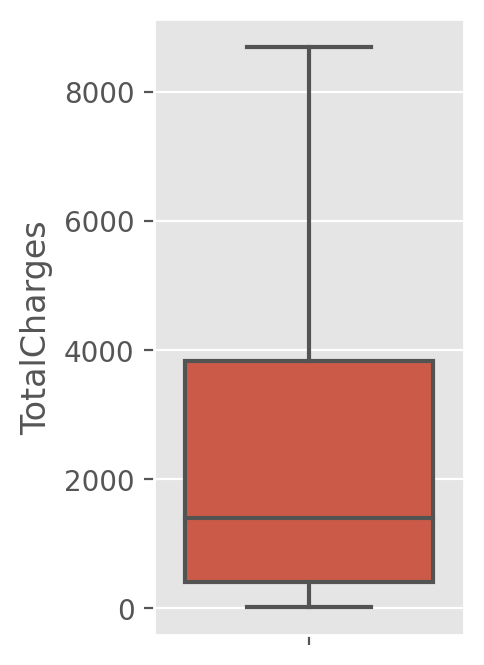

In [16]:
# Checking the trimmed Total Charges variable
plt.figure(figsize=(2, 4))
sns.boxplot(y=data_trimmed['TotalCharges'])

## Target Variable Analysis

Text(0.5, 1.0, 'Churn 1 Distribution')

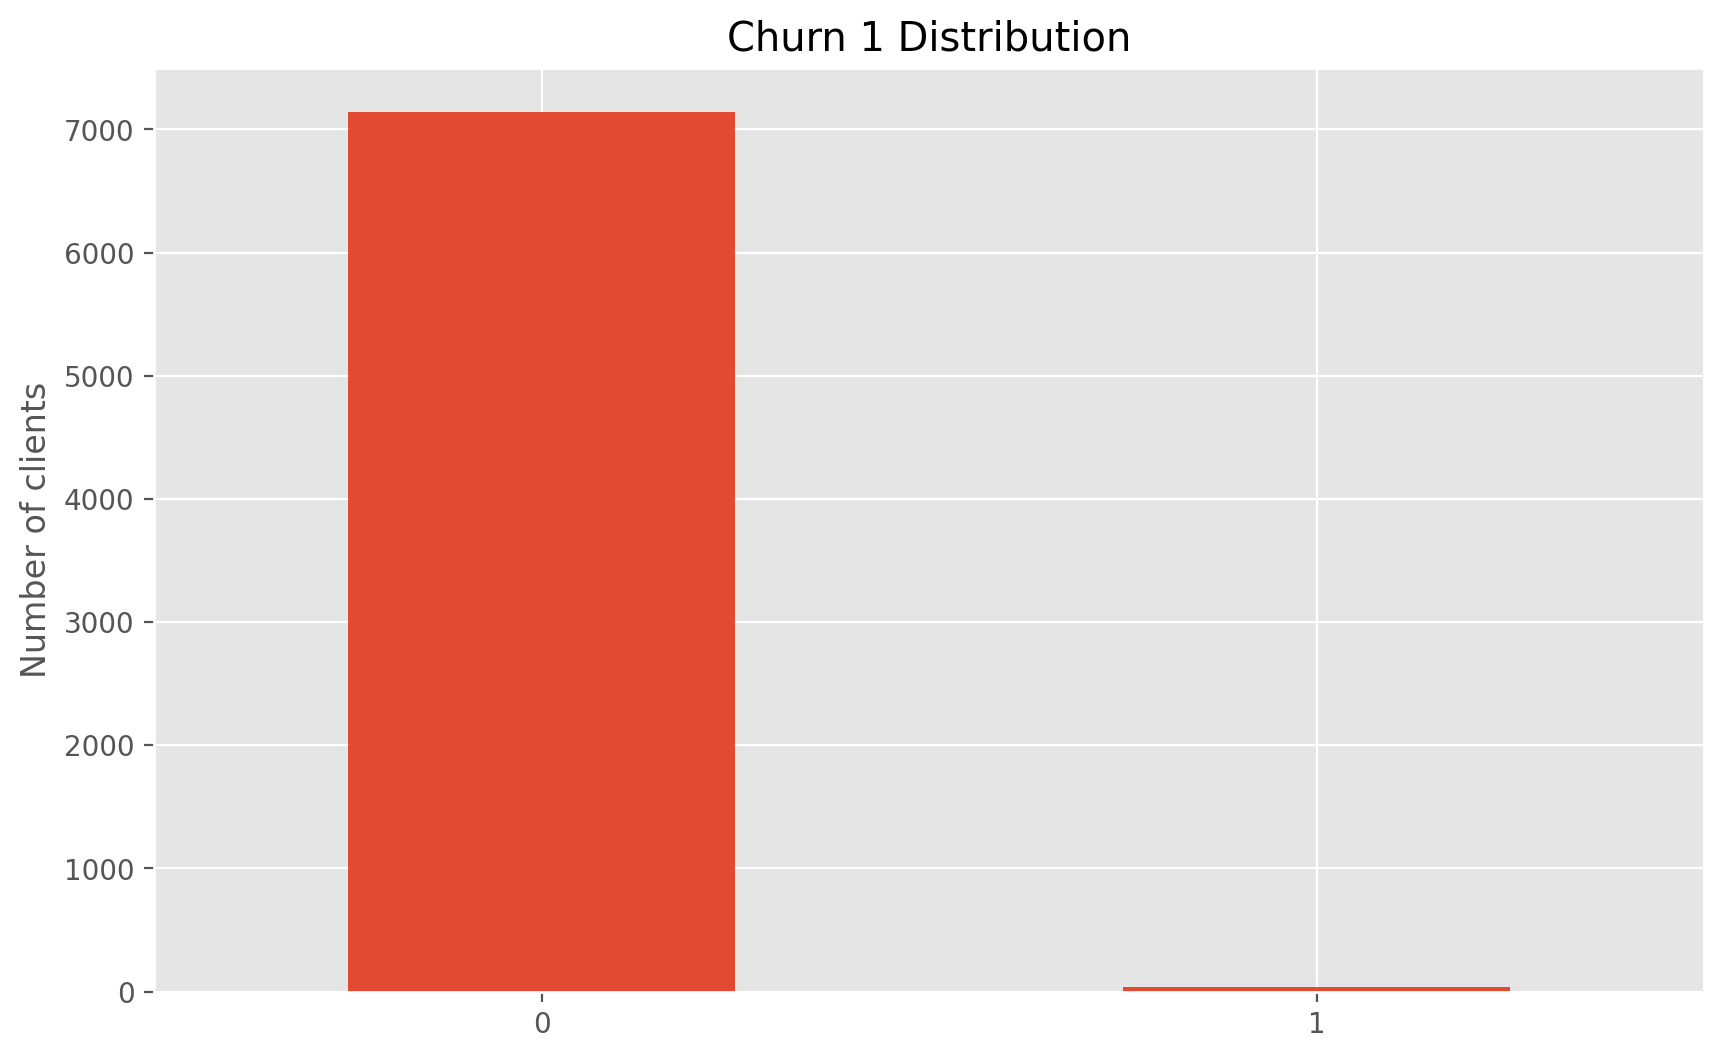

In [17]:
# Churn Bar Plots

data_trimmed['churn_1_month'].value_counts().plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of clients')
plt.title('Churn 1 Distribution')



Text(0.5, 1.0, 'Churn 2 Distribution')

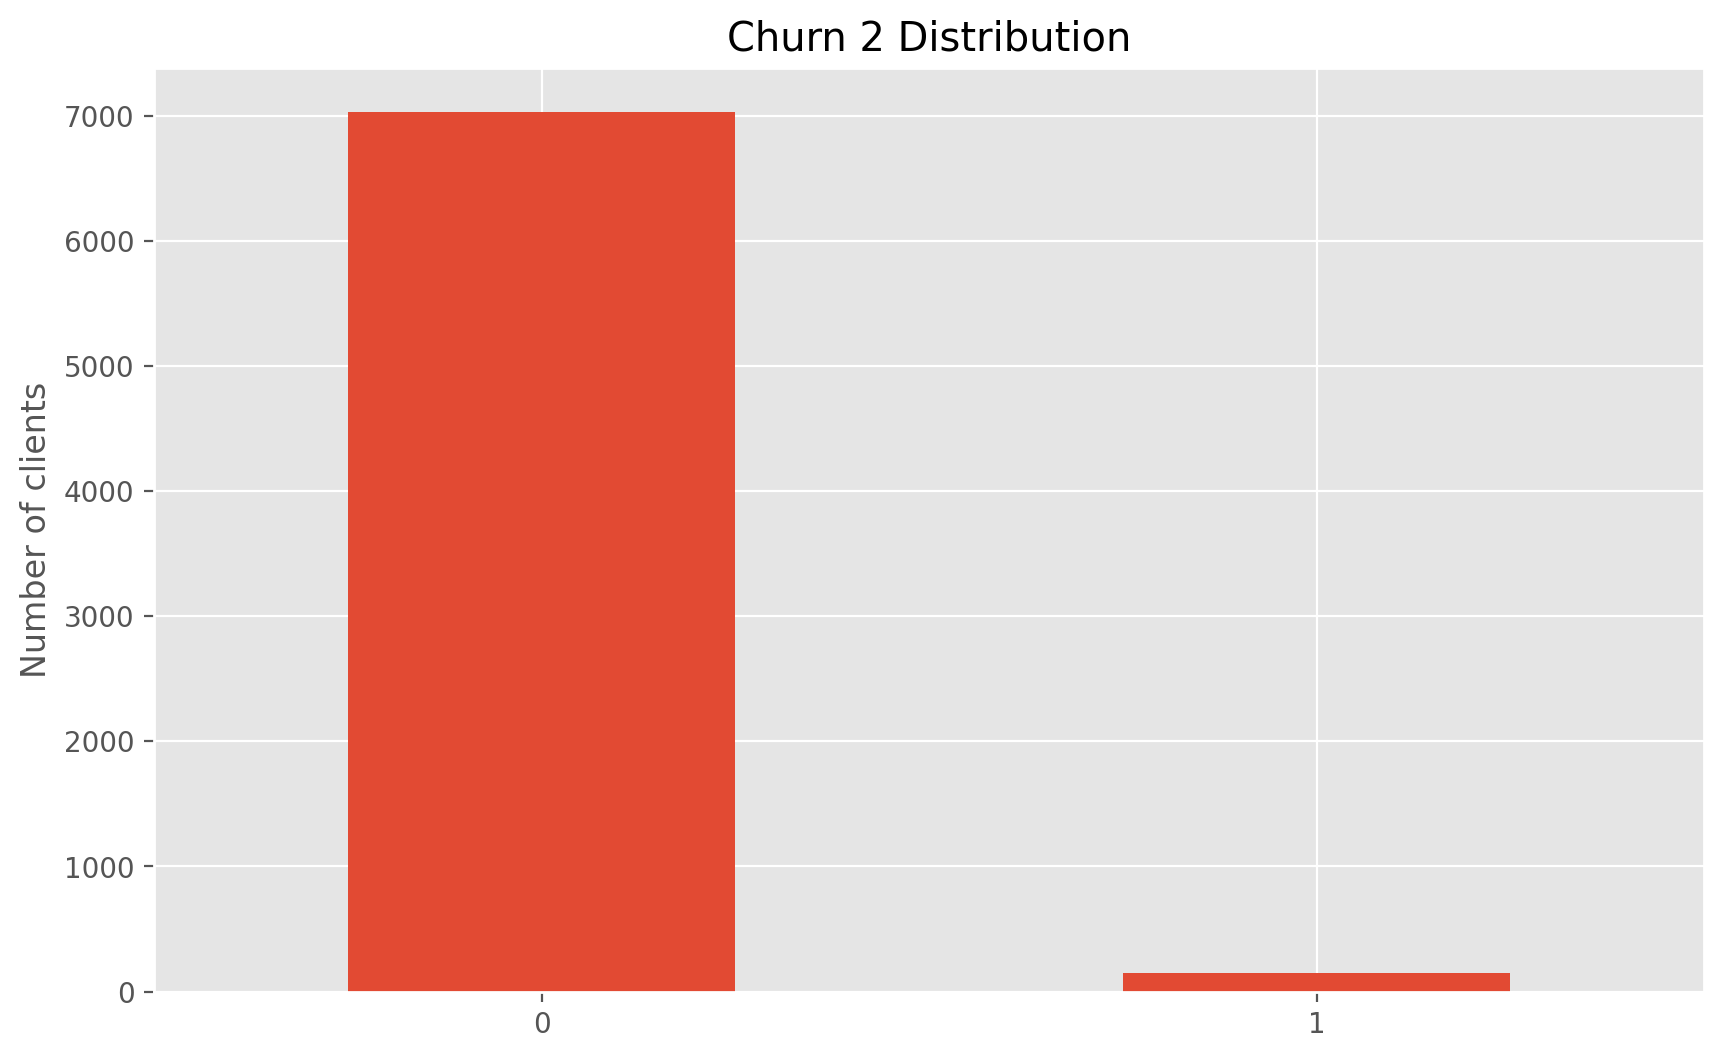

In [18]:
data_trimmed['churn_2_month'].value_counts().plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of clients')
plt.title('Churn 2 Distribution')

Text(0.5, 1.0, 'Churn 3 Distribution')

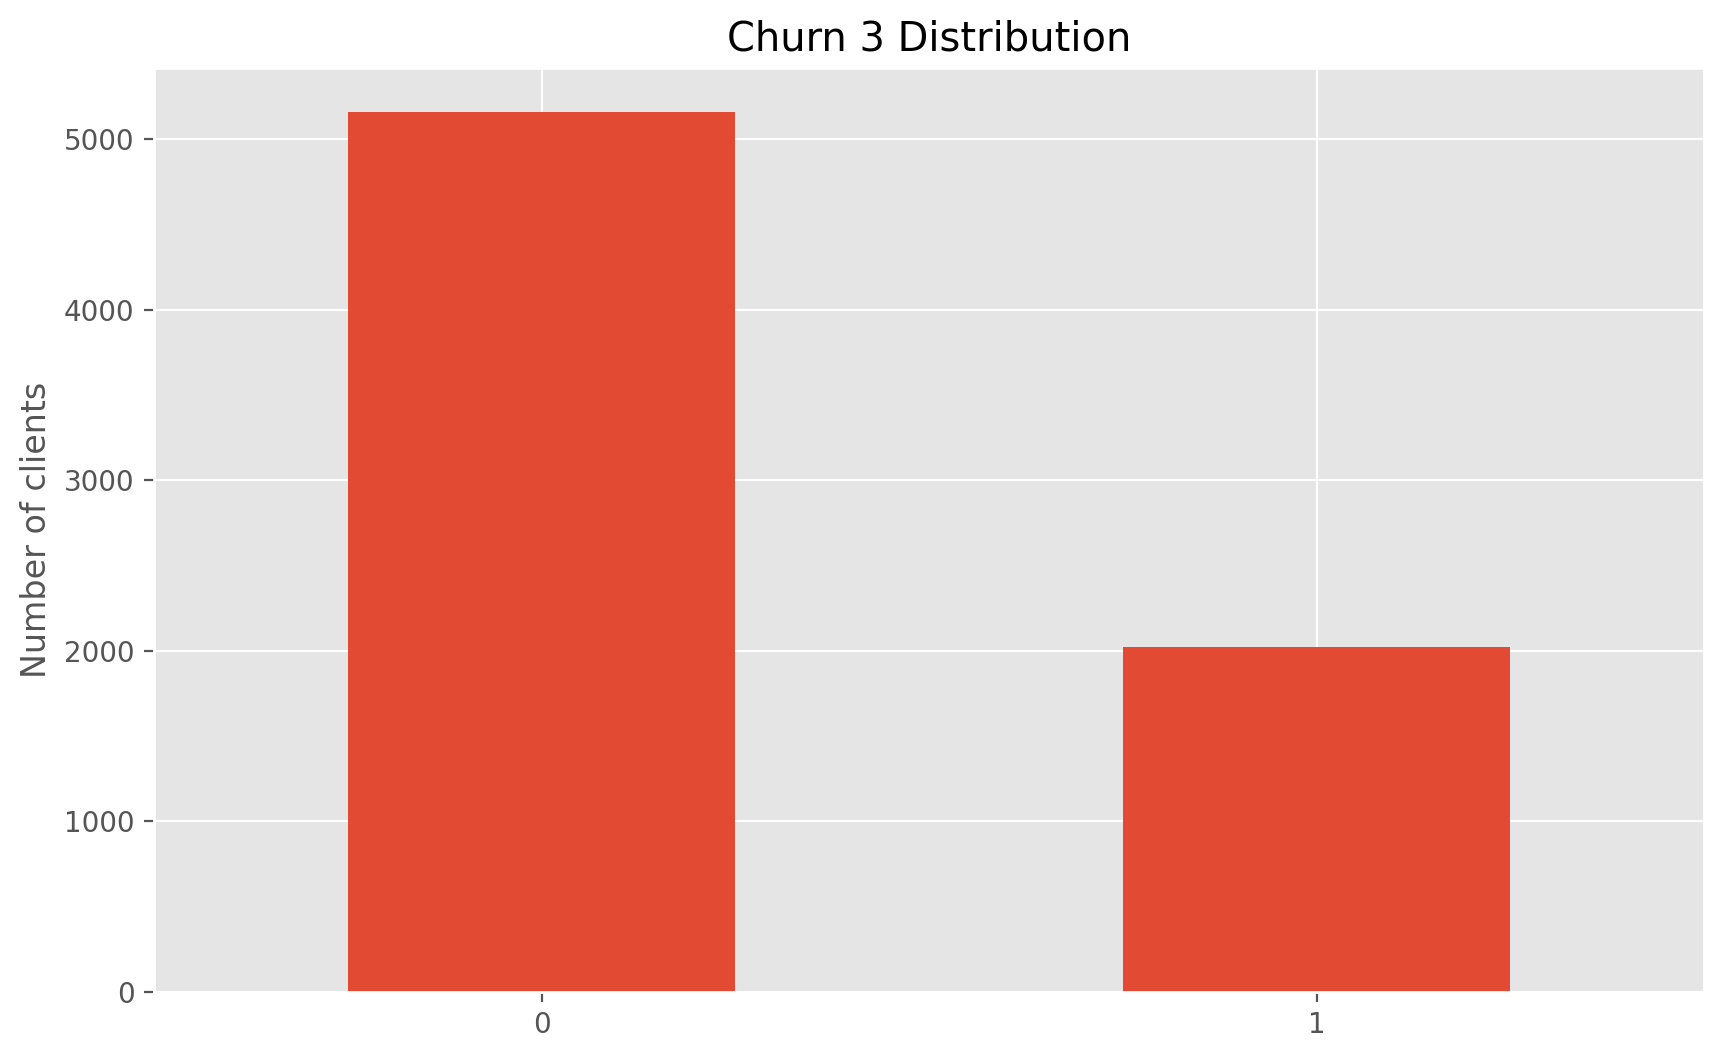

In [19]:
data_trimmed['churn_3_month'].value_counts().plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of clients')
plt.title('Churn 3 Distribution')

#### Analysis of Churn Variables Distribution


From the bar plots we can see that first and second churn are highly biased (most observations are from clients that did not Churn). Also, another point to take into consideration is the fact that Churn 1 is based on past data, so it shouldn´t be used to be able to predict if a client is going to Churn. 

Based on both arguments, I decided to choose Churn 3 as target variable as it contains a more balanced observations of Churned clients and non-churned clients and it´s not based on past data as in the case of Churn 1.

## Assesing Class Imbalance

Class 0: 5163
Class 1: 2019
Proportion: 2.56 : 1


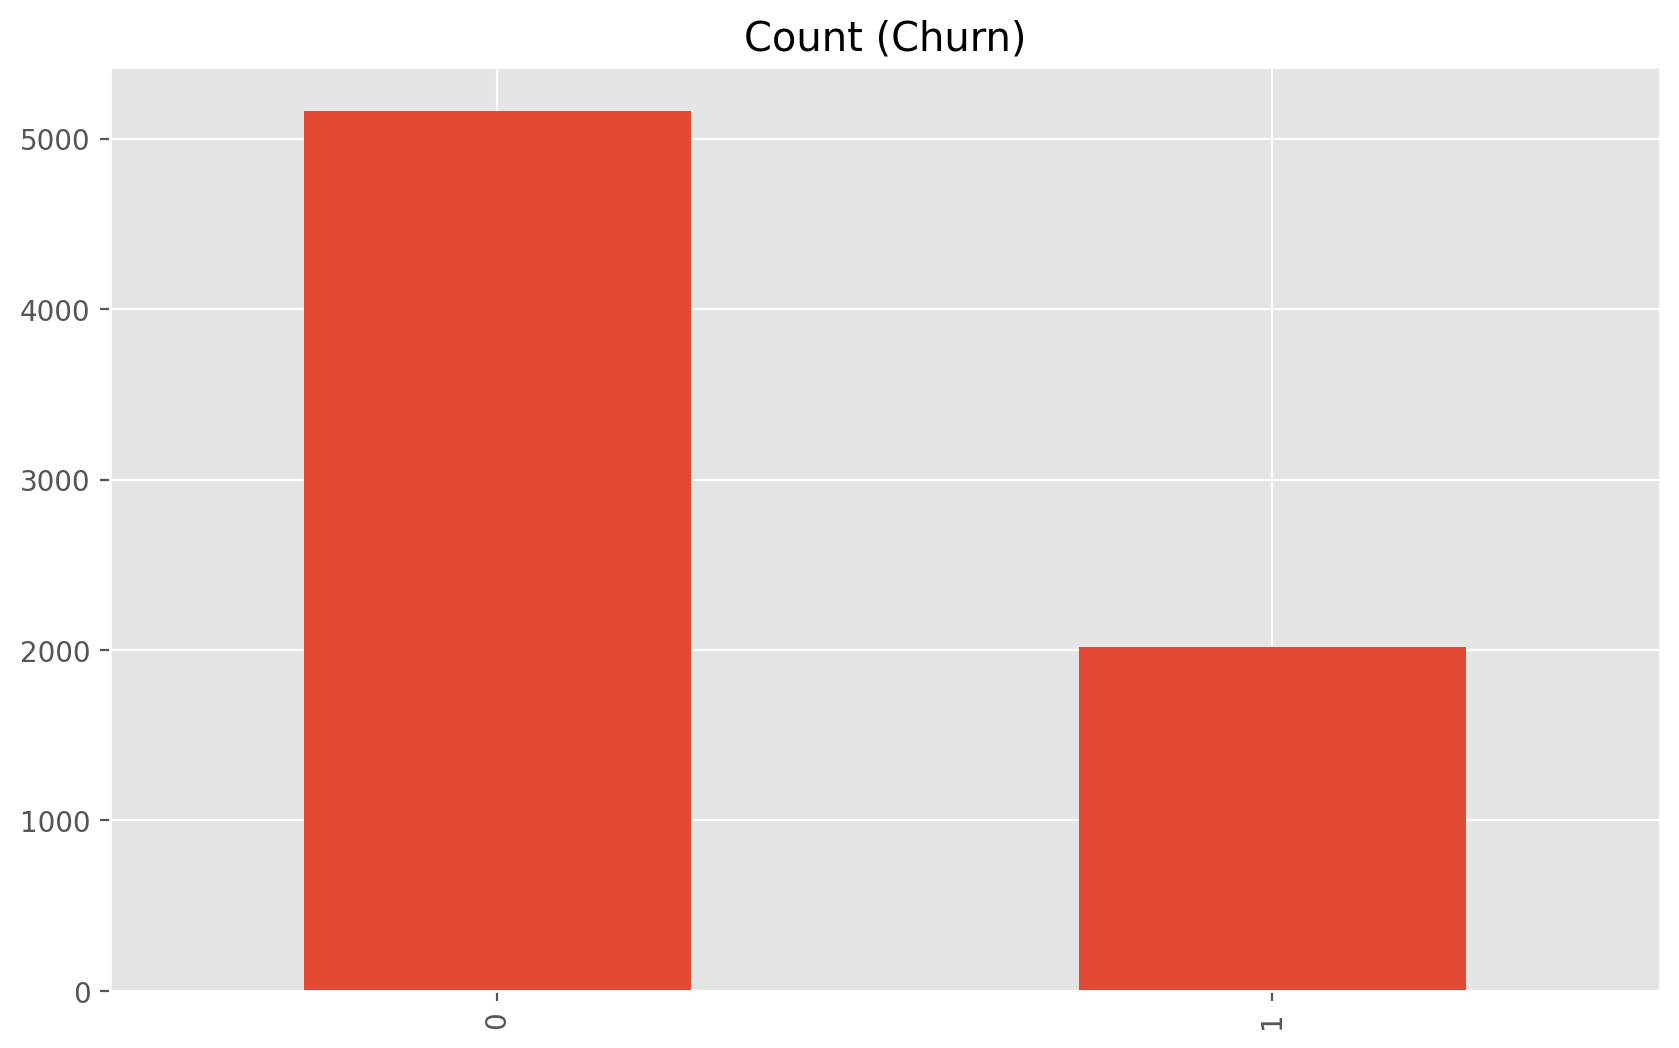

In [20]:
target_count = data_trimmed.churn_3_month.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (Churn)');

As we can see in the bar plot, **there is a clear class imbalance in the target variable** (the proportion of non churned customers and churned customers is 2.56:1)

This could lead to the classifier learning to predict the most common class (getting high accuracy but completly biased)

In [21]:
# Class count
count_class_0, count_class_1 = data.churn_3_month.value_counts()

# Divide by class
df_class_0 = data[data['churn_3_month'] == 0]
df_class_1 = data[data['churn_3_month'] == 1]

Random over-sampling:
0    5174
1    5174
Name: churn_3_month, dtype: int64


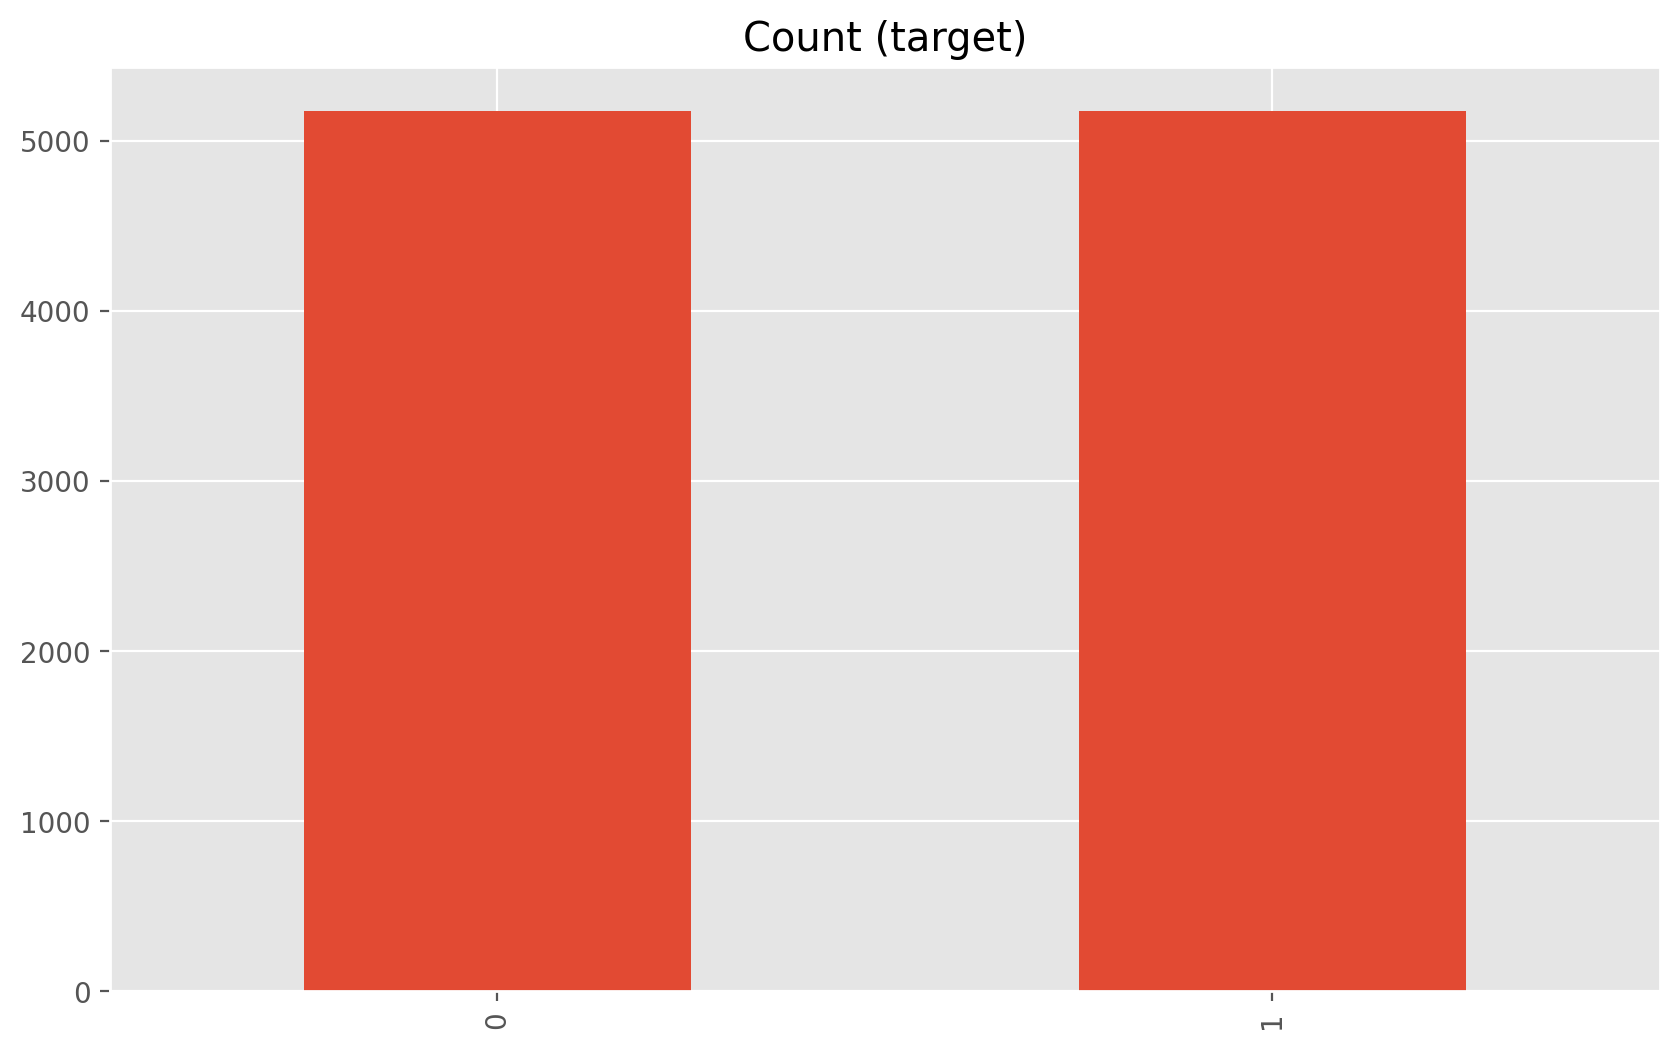

In [22]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_balance = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_balance.churn_3_month.value_counts())

df_balance.churn_3_month.value_counts().plot(kind='bar', title='Count (target)');

Now we have a more balanced target variable that would help our model to make better and more reliable predictions

## EDA Analysis on the dataset

In [23]:
# Inspecting missing values

df_balance.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
churn_1_month       0
churn_2_month       0
churn_3_month       0
dtype: int64

We can see that there is just 1 missing value, so **missing data is not a problem affecting our dataset**

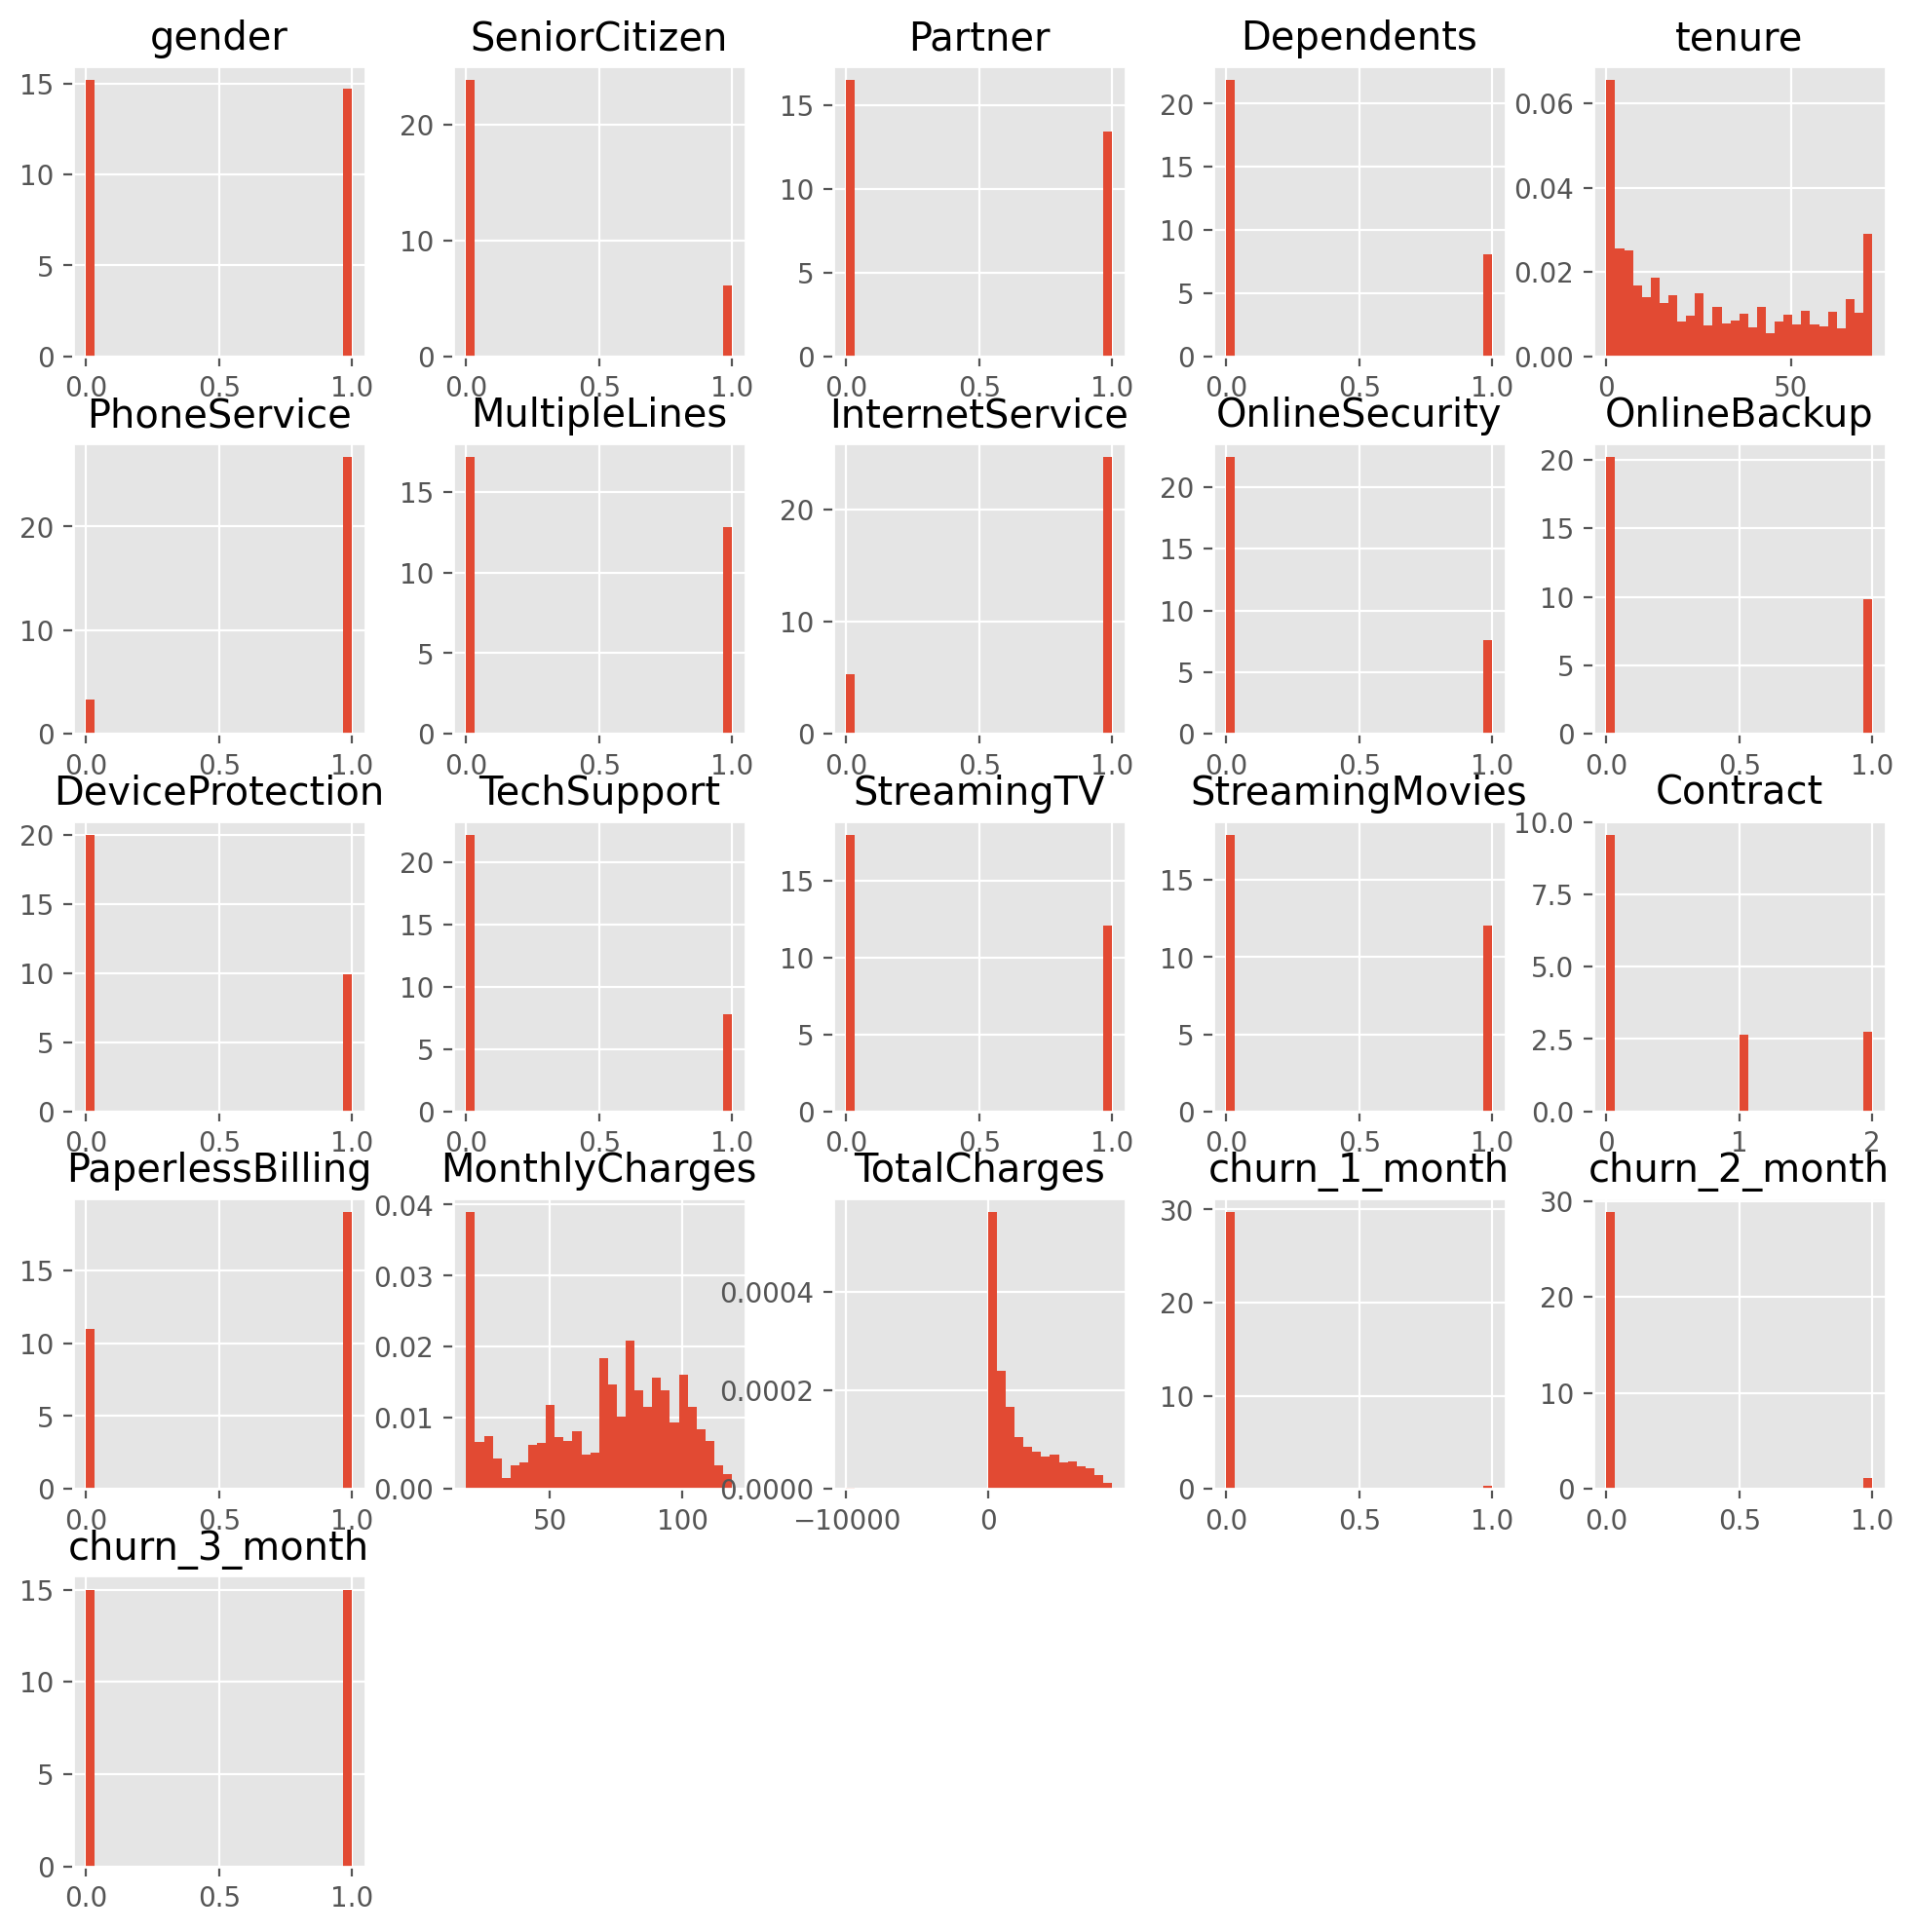

In [24]:
#Distinguishing variables distributions

df_balance.hist(bins=30, figsize=(12,12), density=True)
plt.show()

<AxesSubplot:xlabel='MonthlyCharges'>

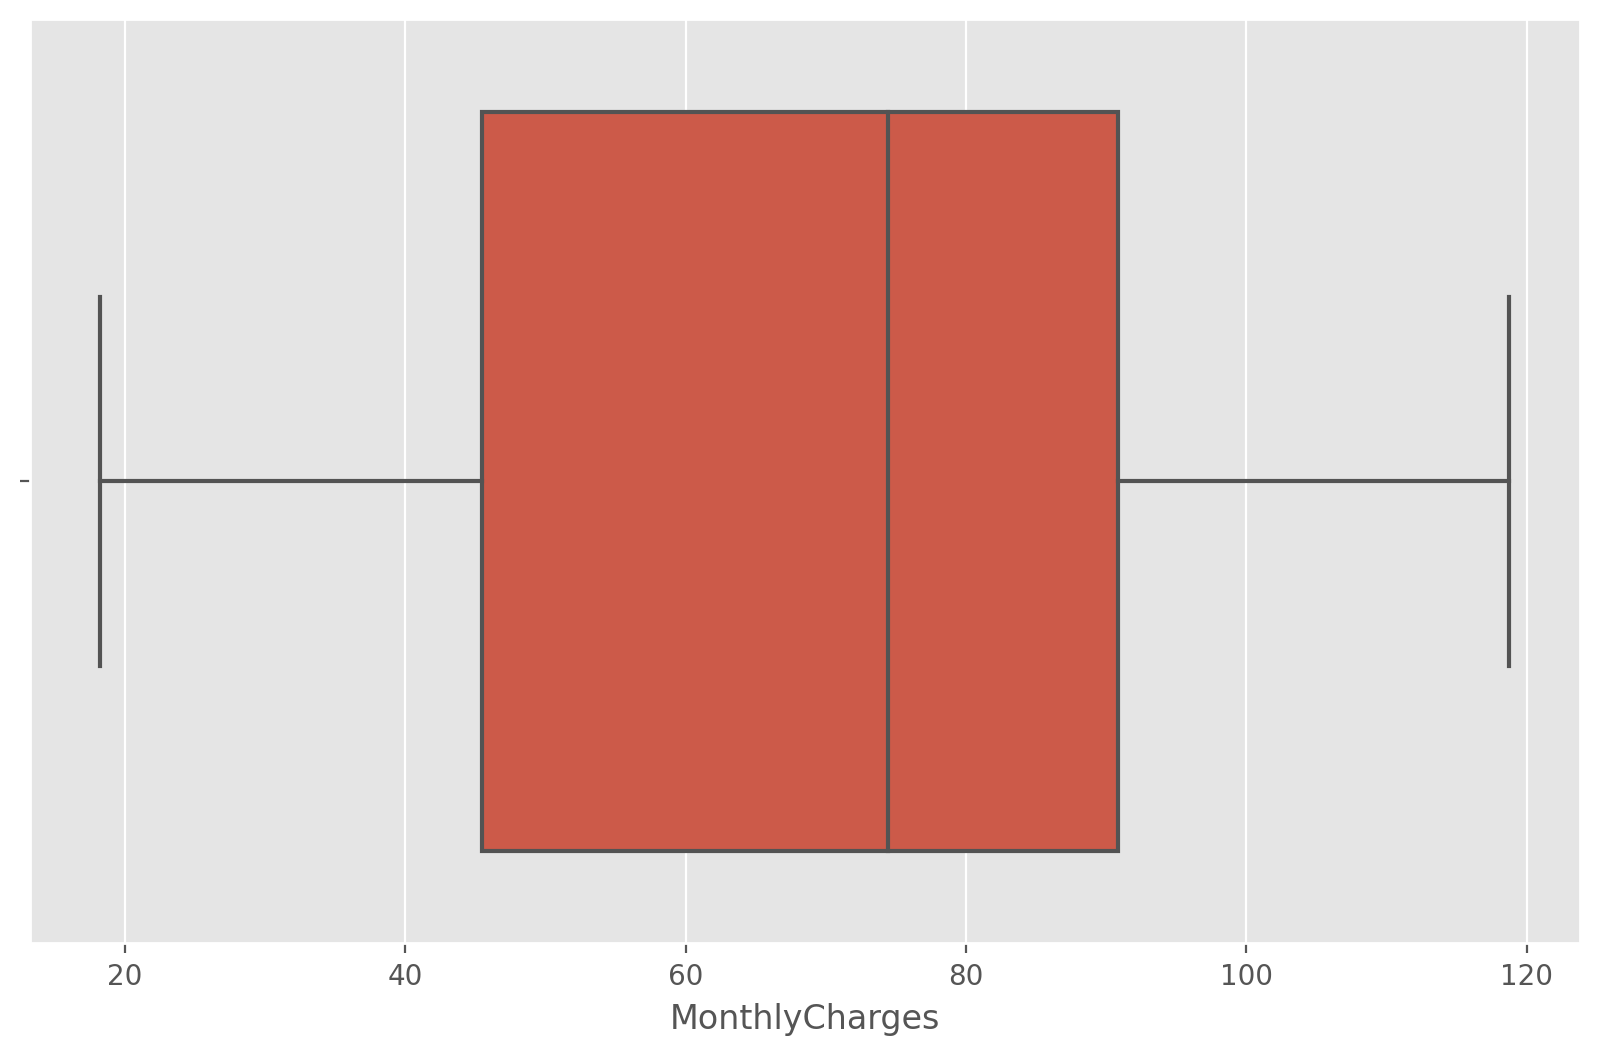

In [25]:
#Box plot on the Monthly Charges

sns.boxplot(x="MonthlyCharges", data=df_balance)

From the Box plot we can see that most customers are charged around 70€ (median)

<AxesSubplot:xlabel='tenure'>

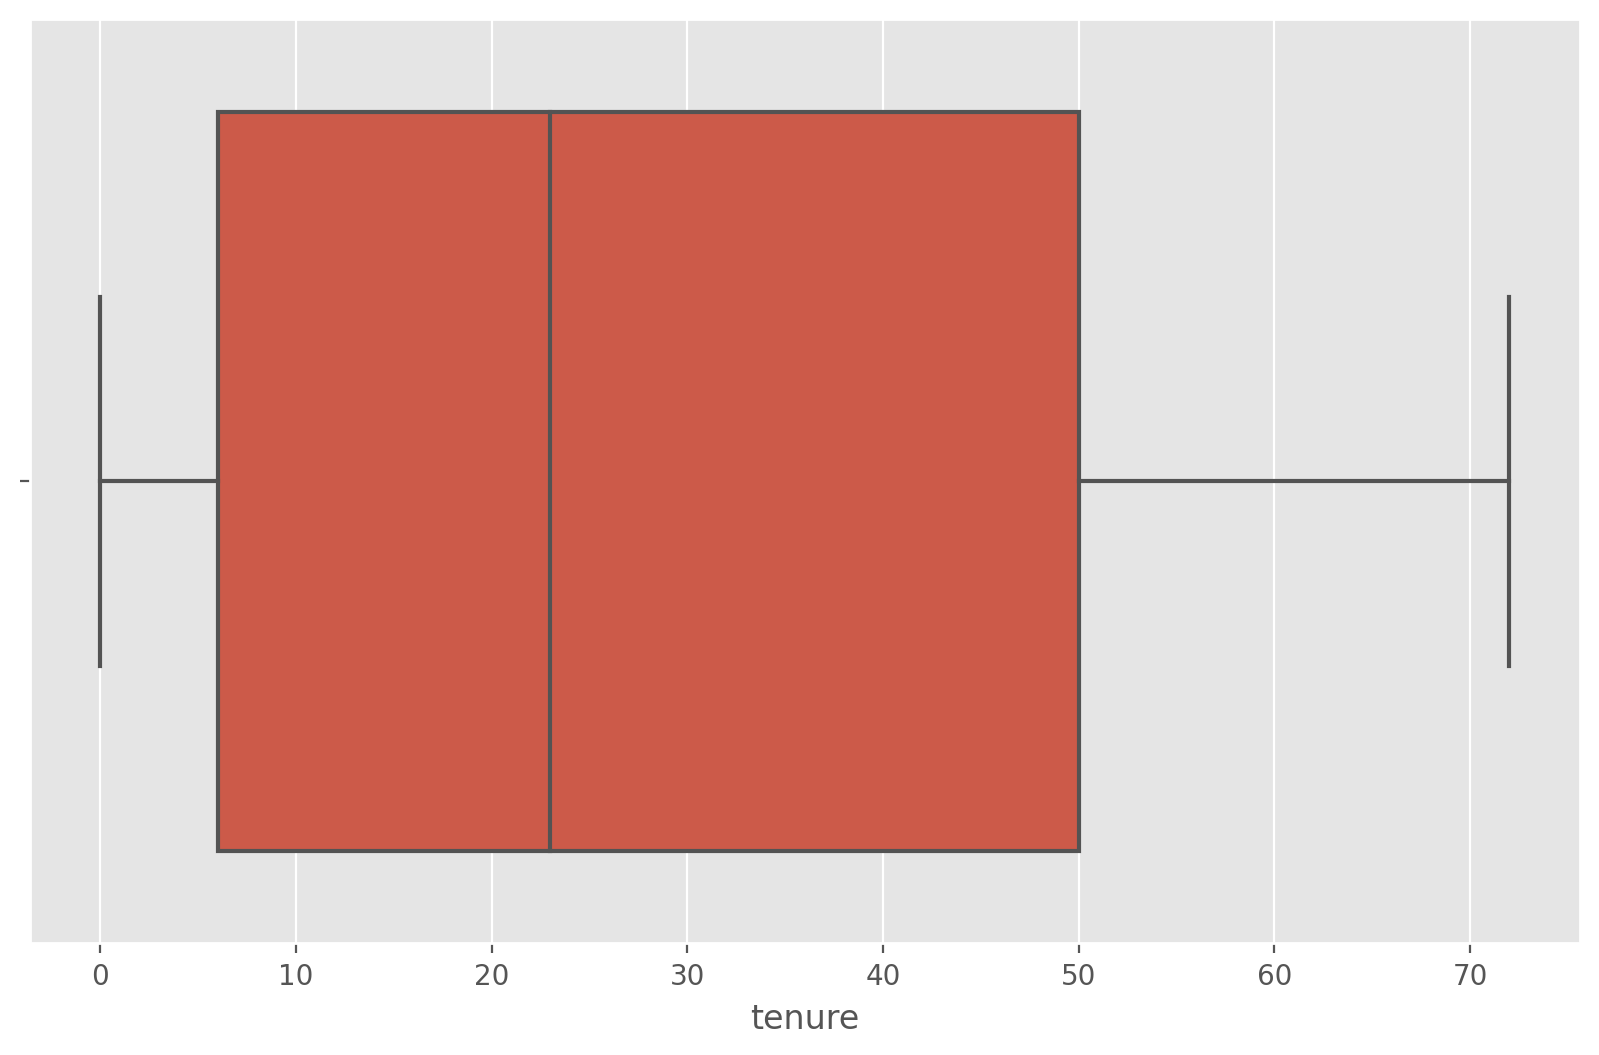

In [26]:
#Box plot on the number of months that customers have stayed with the company

sns.boxplot(x="tenure", data=df_balance)

From the Box plot we can see that most customers have stayed around 30 moths with the company (median)

<AxesSubplot:xlabel='gender', ylabel='count'>

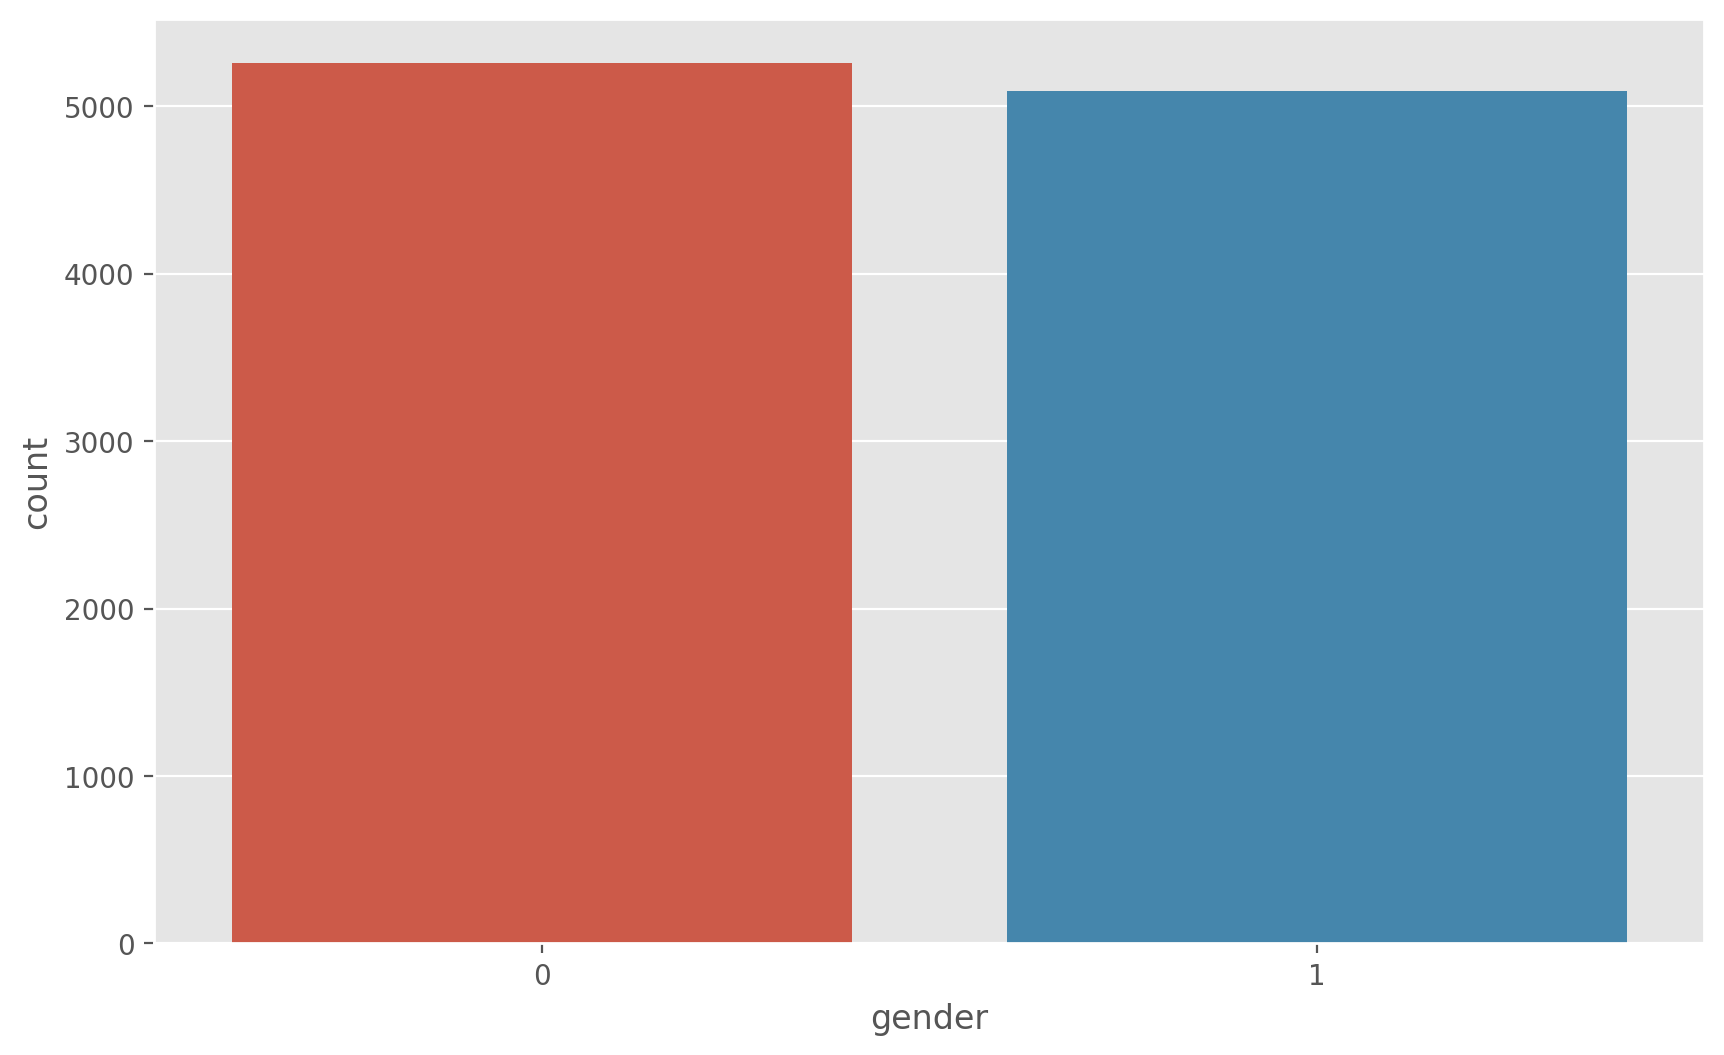

In [27]:
# Analyzing the gender distribution of the dataset
sns.countplot(x="gender", data=df_balance)

From the bar plot we can see that we almost have the **same proportion of males and females in the dataset**

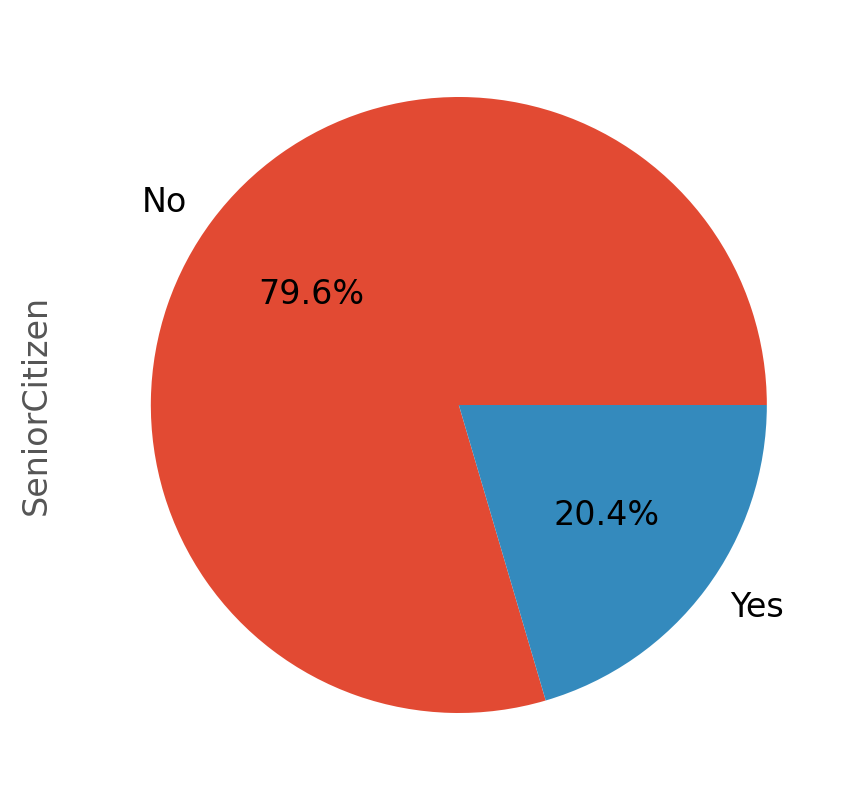

In [28]:
#Pie chart to represent the distribution of senior citizens in the dataset

ax = (df_balance['SeniorCitizen'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )

From the pie chart we realize that **most of the customers are young (83.2%)**

## Feature Importance

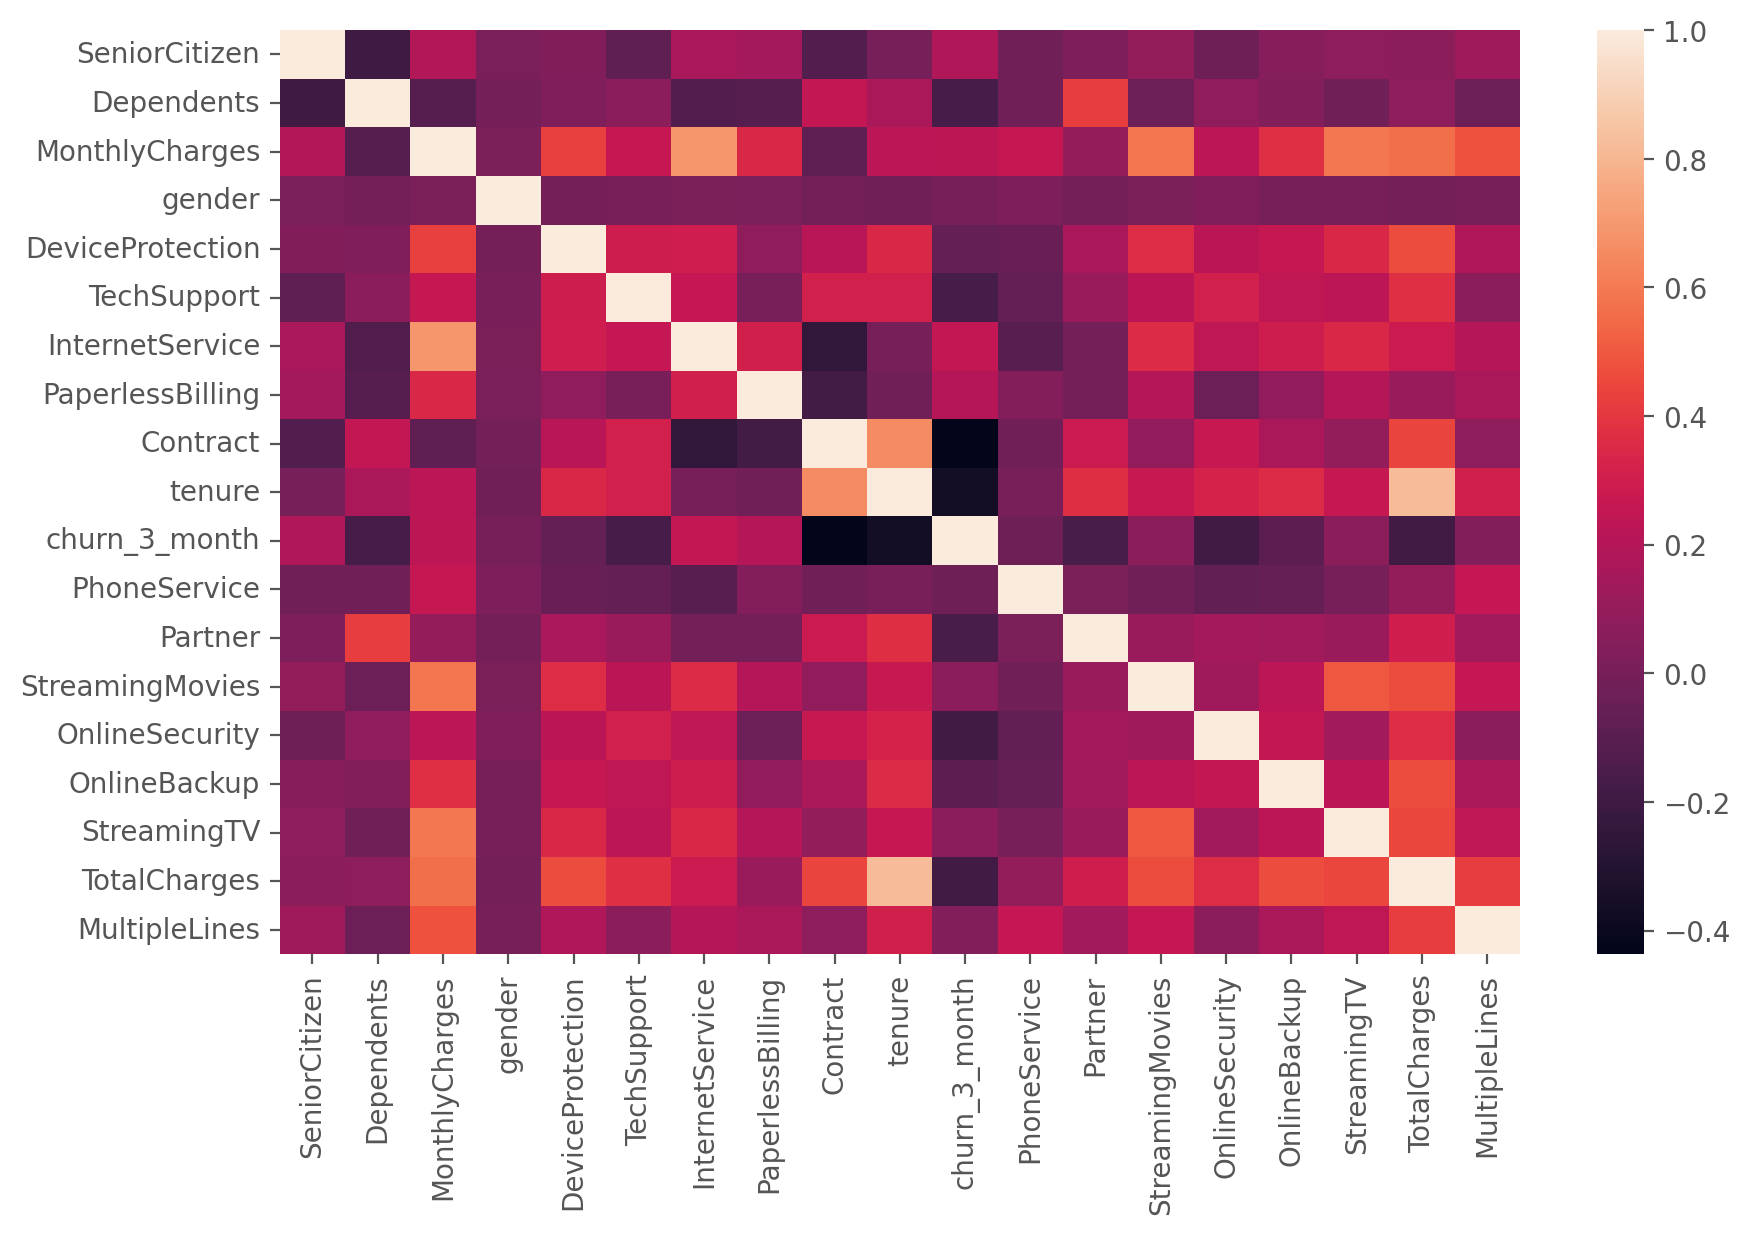

In [29]:
# Plotting correlation of numerical variables
numerical = list(
    set(df_balance.columns)
    - set(
        ["churn_1_month","churn_2_month","CustomerID","PaymentMethod"]

        
    )
)

# Calculate and plot
corr_matrix = df_balance[numerical].corr()
sns.heatmap(corr_matrix);

From the Matrix we can see that the variables that are **more positive correlated to churn** are Streaming TV, Paperless Billing, Multiple Lines, Internet Service, Monthly Charges, Phone Services and Senior Citizens.

Also, it is interesting to see how the variables Tenure and Contract are **negatively correlated** to Churn. Which is very useful in our analysis because we want to asses how to avoid churning.

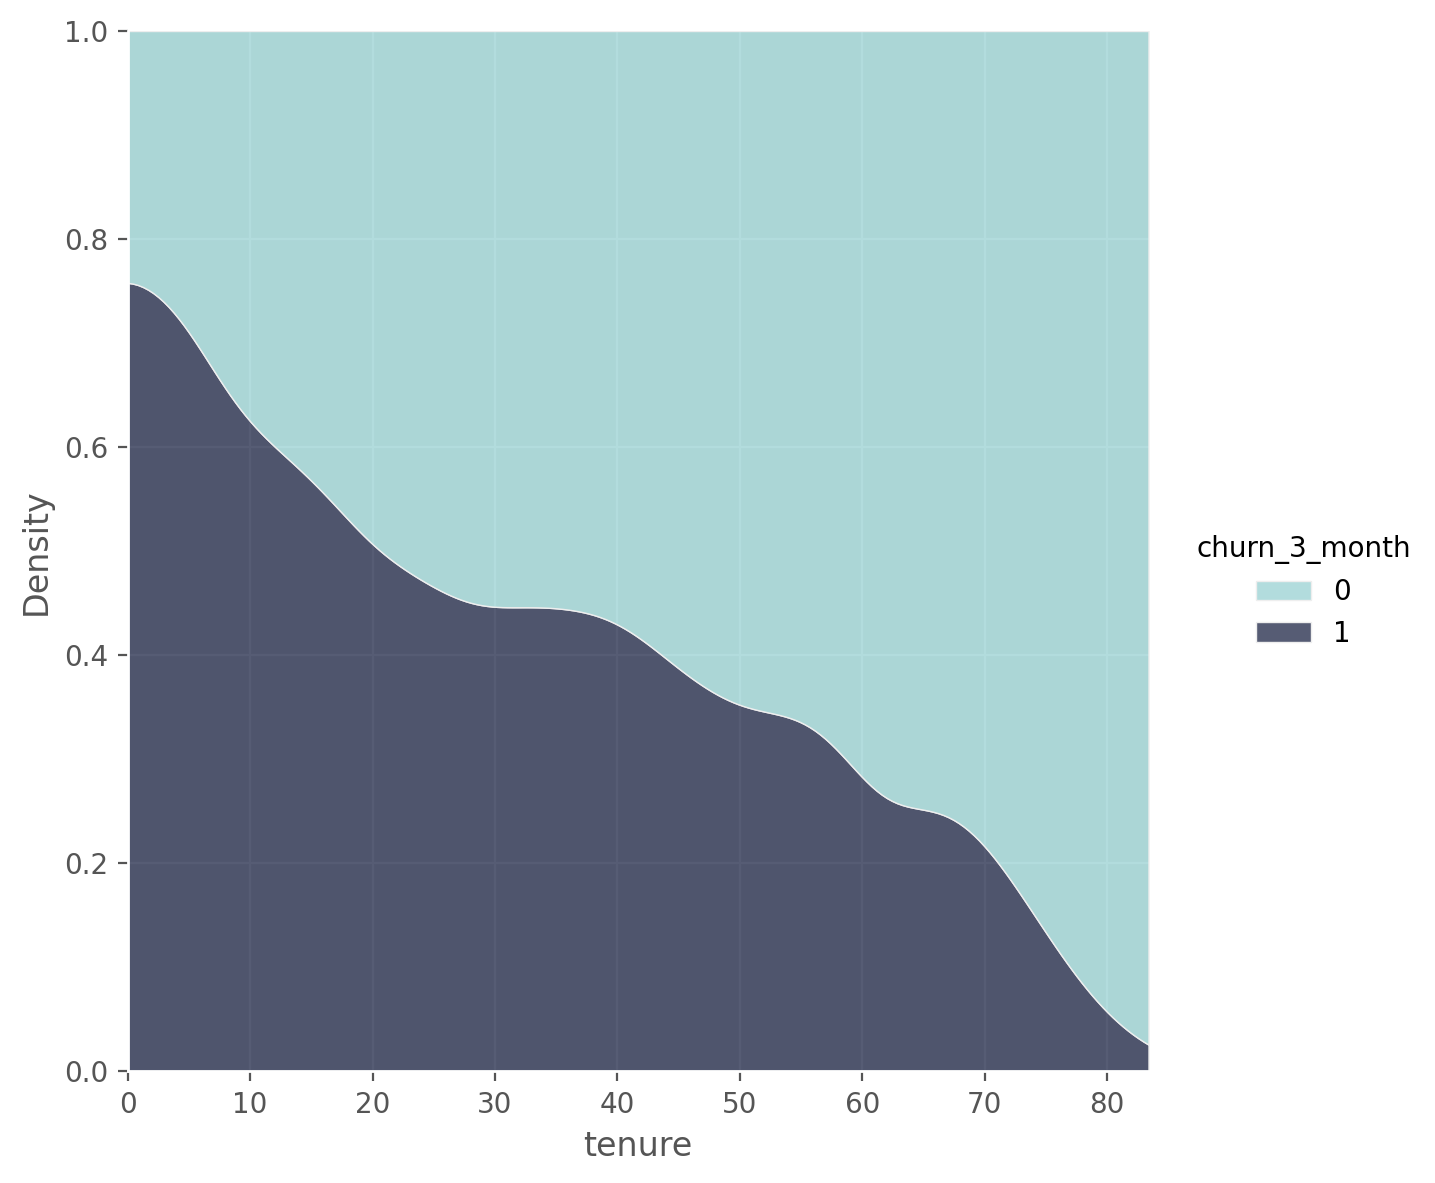

In [30]:
# Density Plot
sns.displot(
    data=df_balance,
    x="tenure", hue="churn_3_month",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

This density plot is very interesting because we are able to see how the Churn density decreases when the tenure increases. So the major insight from this graph is that **customers that have stayed longer in the company are usualy more loyal and maybe less likely to churn**

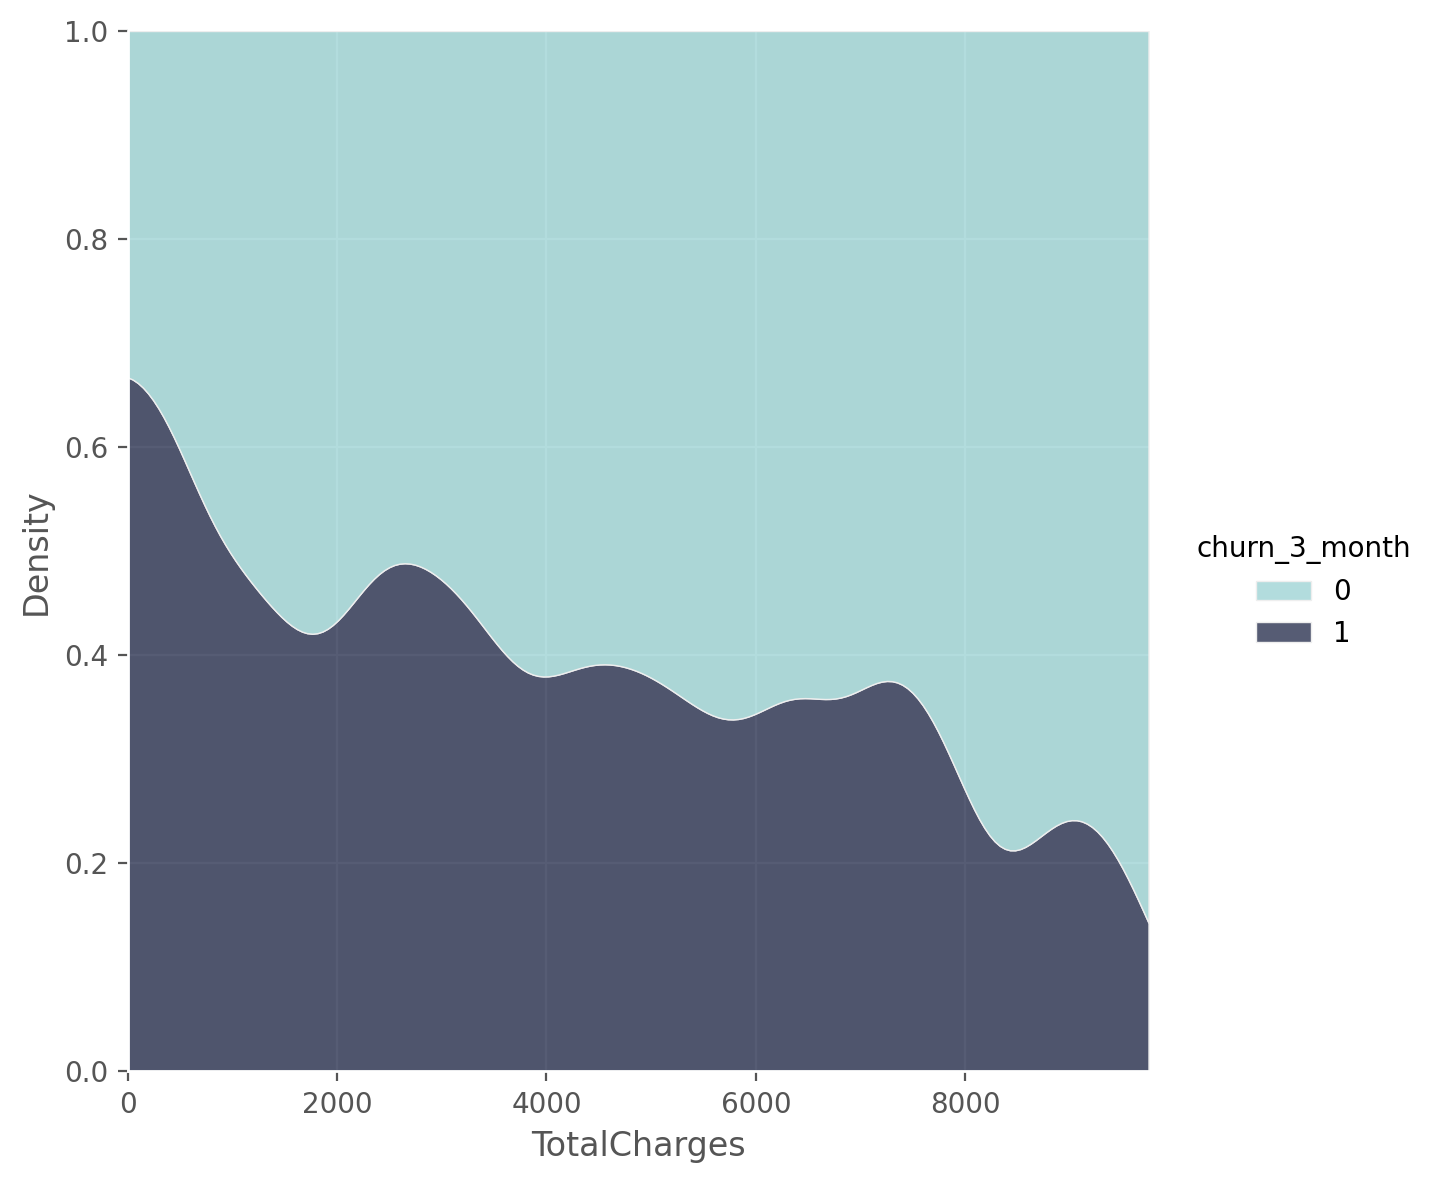

In [31]:
# Density Plot
sns.displot(
    data=df_balance,
    x="TotalCharges", hue="churn_3_month",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

It **seems that there is higer churn when the total charges are lower**. This goes in the same direction as in the outcome of the previous graph, it seems that customers churn in the firsts months of being in the company

Text(0.5, 1.0, 'Churn by Seniority Level')

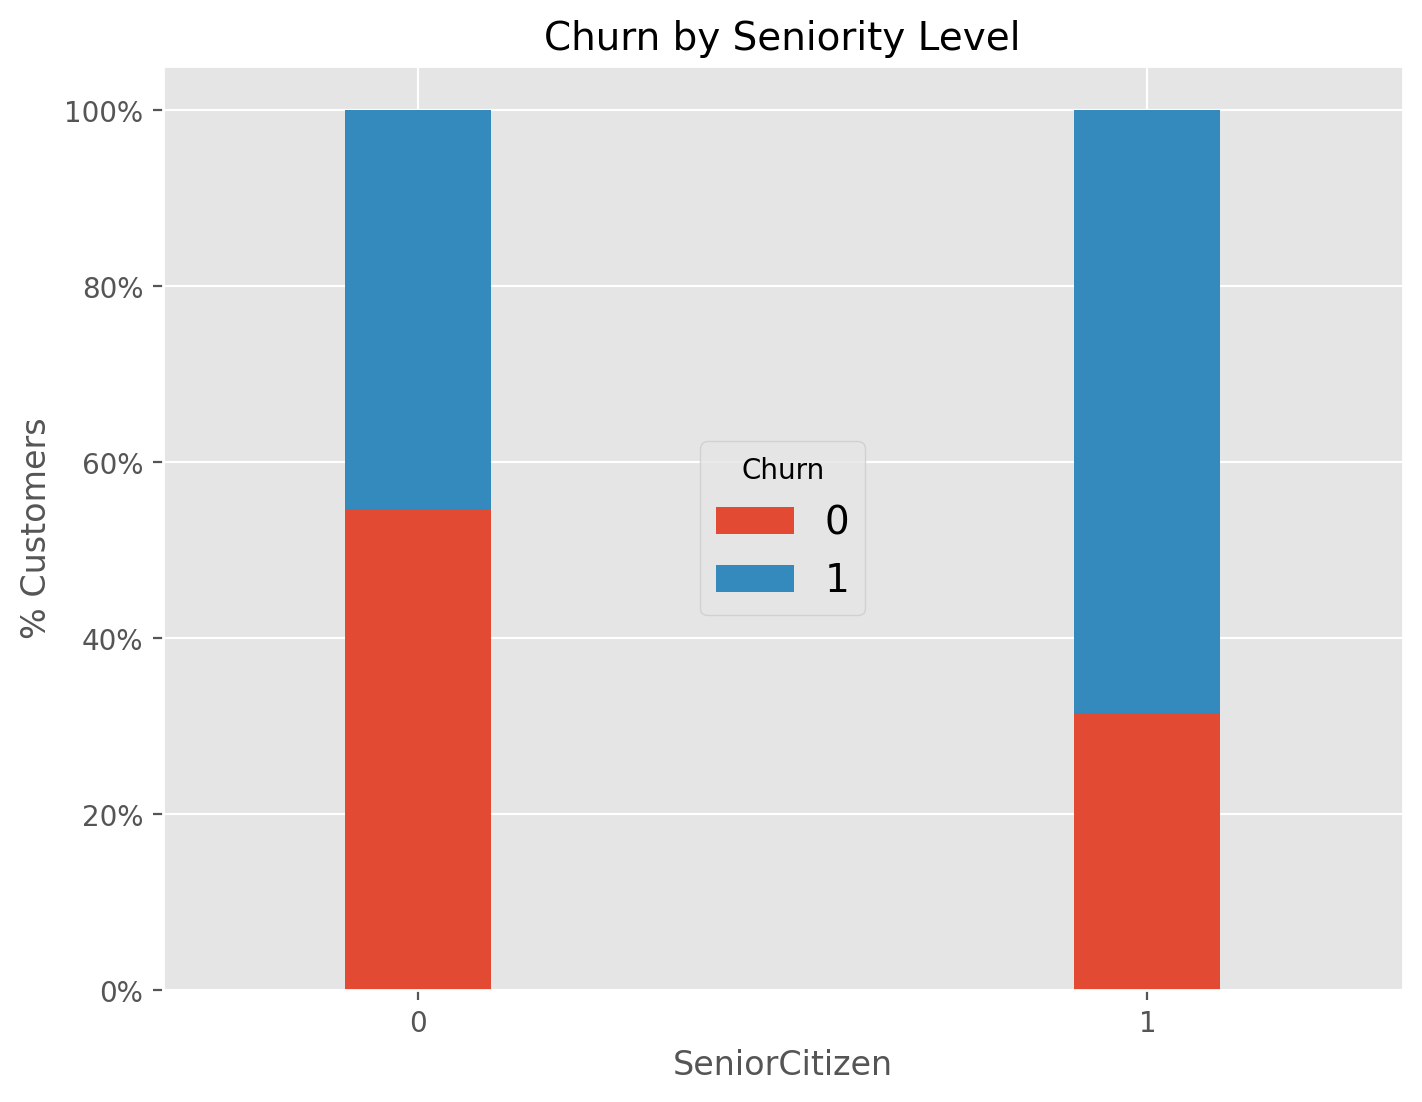

In [32]:
#Assesing the posible relatioship between Churn and Senior Citizens

import matplotlib.ticker as mtick
seniority_churn = df_balance.groupby(['SeniorCitizen','churn_3_month']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6))

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

From the chart we can see that a **higher percentage of young citizens churn in comparison with Senior Citizens**

### Selecting the variables that are going to be considered in the model after the EDA analysis

In [33]:
data_final = df_balance[["churn_3_month","SeniorCitizen","StreamingTV","PaperlessBilling","MultipleLines","InternetService","tenure","Contract","MonthlyCharges","PhoneService"]].copy()

## Spliting the data

In [34]:
#Spliting data

from sklearn.model_selection import train_test_split
from feature_engine.imputation import CategoricalImputer

X = data_final.drop(columns='churn_3_month')
y = data_final.loc[:, 'churn_3_month']

X_train, X_test, y_train, y_test = train_test_split(
    X,  # predictors
    y,  # target
    test_size=0.25,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

## Creating the set of models

After analyzing the problem we can see that we have a **classification problem** (we want to clasify customers as potential "churners" or not). In this case it is a **prescriptive data analysis** because we want to solve the question: "What should I do to avoid people churning".

In [35]:
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection



def create_models(seed=2):

    models = []
    models.append(('k_nearest_neighbors', KNeighborsClassifier()))
    models.append(('logistic_regression', LogisticRegression(random_state=seed)))
    models.append(('support_vector_machines', SVC(random_state=seed)))
    models.append(('random_forest', RandomForestClassifier(random_state=seed)))
    models.append(('gradient_boosting', GradientBoostingClassifier(random_state=seed)))
    
    return models

# create a list with all the algorithms we are going to assess
models = create_models()

## Model selection

In [36]:
from sklearn.metrics import accuracy_score

results = []
names = []
scoring = "accuracy"
for name, model in models:
    # fit the model with the training data
    model.fit(X_train, y_train).predict(X_test)
    # make predictions with the testing data
    predictions = model.predict(X_test)
    # calculate accuracy 
    accuracy = accuracy_score(y_test, predictions)
    # append the model name and the accuracy to the lists
    results.append(accuracy)
    names.append(name)
    # print classifier accuracy
    print('Classifier: {}, Accuracy: {})'.format(name, accuracy))

Classifier: k_nearest_neighbors, Accuracy: 0.7642056436026285)
Classifier: logistic_regression, Accuracy: 0.7278701198299188)
Classifier: support_vector_machines, Accuracy: 0.7124081948202551)
Classifier: random_forest, Accuracy: 0.8797835330498647)
Classifier: gradient_boosting, Accuracy: 0.7661383842288365)


I´m selecting the **Random forest** model because is the one with higher accuracy

## Hyperparameters selection

In [37]:
# Initialize the set of parameters for exhaustive search and fit 
from sklearn.model_selection import (GridSearchCV, StratifiedKFold,
                                     cross_val_score)


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

parameters = {'max_features': [4, 7, 10, 13], 
              'min_samples_leaf': [1, 3, 5, 7], 
              'max_depth': [5, 10, 15, 20]}
rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
gcv = GridSearchCV(rfc, parameters, n_jobs=-1, cv=skf, verbose=1)
my_model= gcv.fit(X_train, y_train)
my_model

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': [4, 7, 10, 13],
                         'min_samples_leaf': [1, 3, 5, 7]},
             verbose=1)

In [38]:
gcv.best_params_, gcv.best_score_

({'max_depth': 20, 'max_features': 4, 'min_samples_leaf': 1},
 0.848215708206929)

## Analyzing model performance

In [39]:
from sklearn.metrics import confusion_matrix

gcv_predictions = gcv.predict(X_test)

# construct the confusion matrix
confusion_matrix = confusion_matrix(y_test, gcv_predictions)

# visualize the confusion matrix
confusion_matrix

array([[1031,  234],
       [  77, 1245]], dtype=int64)

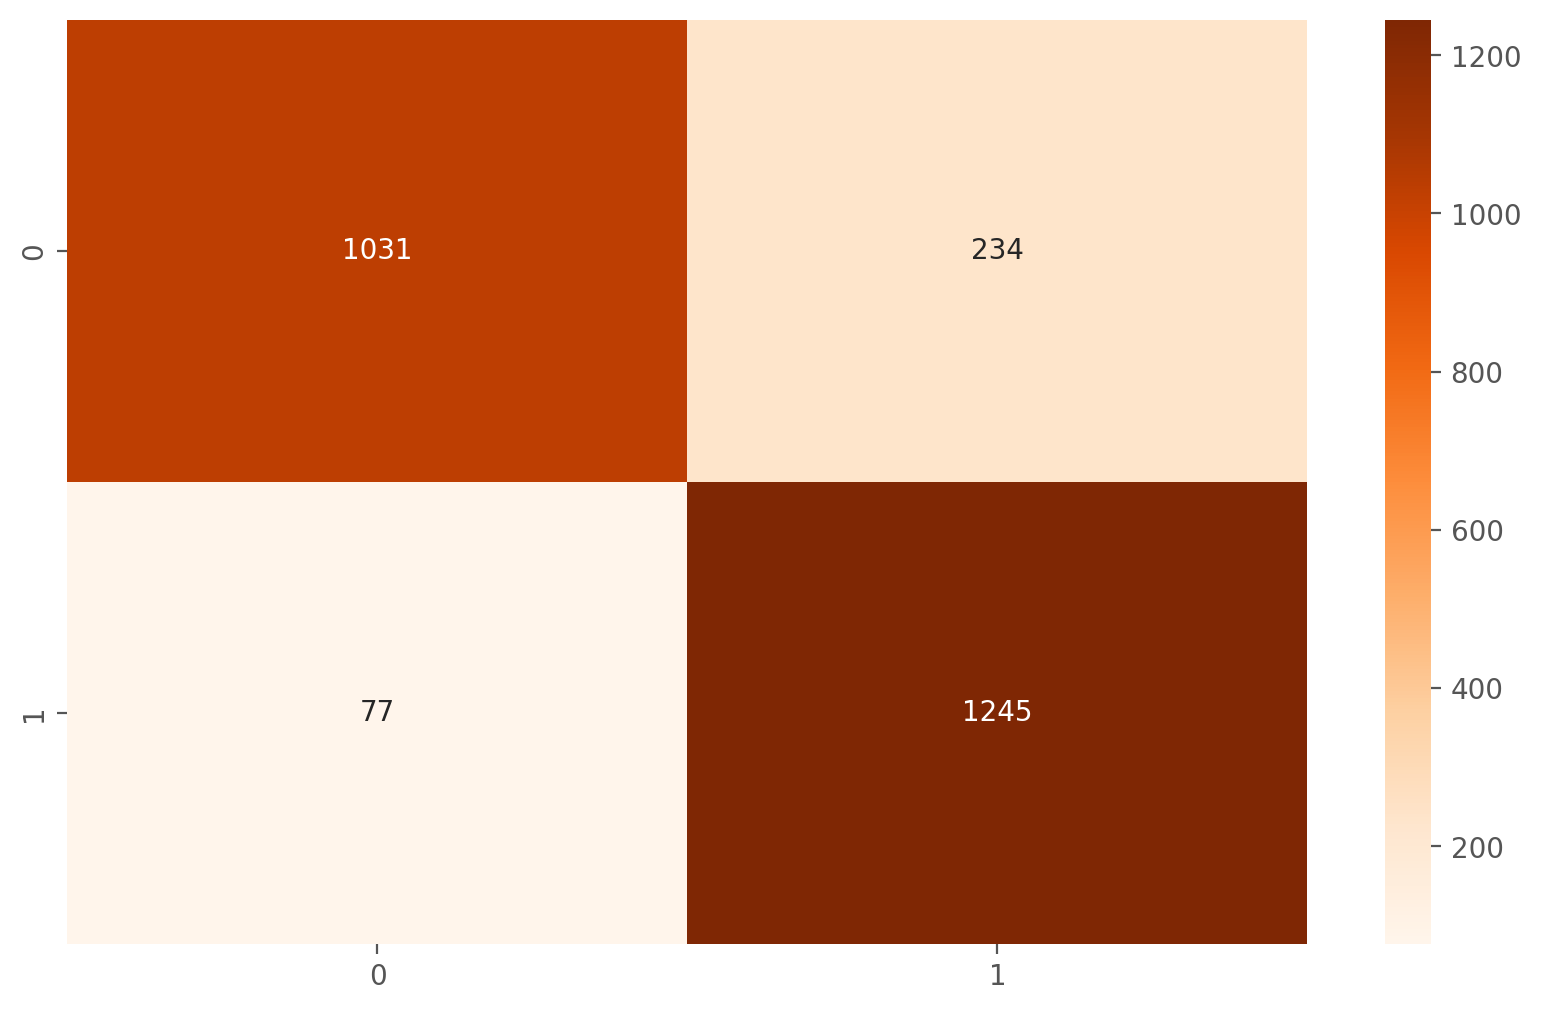

In [40]:
import seaborn as sn
columns = np.unique(y_test)

df_confusion_matrix = pd.DataFrame(confusion_matrix, index=columns, columns=columns)
ax = sn.heatmap(df_confusion_matrix, cmap='Oranges', annot=True, fmt='g')

As shown in the confusion matrix above, **2252 observations of the testing data were correctly classified by the model** (1013 true negatives and 1239 true positives). However, we can observe **335 misclassifications** (252 false positives and 83 false negatives).

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, gcv_predictions))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1265
           1       0.84      0.94      0.89      1322

    accuracy                           0.88      2587
   macro avg       0.89      0.88      0.88      2587
weighted avg       0.89      0.88      0.88      2587



Using the clasiffication report we can also evaluate the performance of the model in measures such as precision, sensitivity, f1-score, and support (number of samples) achieved for each class.

As shown above, we obtain a **sensitivity of 0.94** and a **specificity of 0.80**. So this tell us that the model predicts slightly more accurate customers that churn.

From the analysis on the model performance we can see that the **final accuracy after the hyperparameter selection is 0.88**

## Saving the model

In [42]:
import pickle
filename = 'churn_practice_model.sav'
pickle.dump(gcv, open(filename, 'wb'))

Code to load the model:

In [43]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8797835330498647


## Feature importance and SHAP values

In [44]:
#Permutation importance

import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(my_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.2973 ± 0.0109,MonthlyCharges
0.2283 ± 0.0170,tenure
0.1506 ± 0.0129,Contract
0.0994 ± 0.0080,InternetService
0.0792 ± 0.0121,PaperlessBilling
0.0654 ± 0.0124,MultipleLines
0.0543 ± 0.0046,StreamingTV
0.0499 ± 0.0073,SeniorCitizen
0.0192 ± 0.0016,PhoneService


In [45]:
# Feature importance

my_model= rfc.fit(X_train, y_train)
base_features = [c for c in data_final.columns if c != "churn_3_month"]

feat_imp_df = pd.DataFrame(rfc.feature_importances_, 
                           base_features).rename(columns = {0: 'feature_importance'})

feat_imp_df['feature'] = feat_imp_df.index

feat_imp_df = feat_imp_df.reset_index()[['feature_importance',
                                         'feature']].sort_values(by = 'feature_importance', ascending = True)

In [46]:
feat_imp_df

,feature_importance,feature
8,0.014552,PhoneService
3,0.019075,MultipleLines
1,0.019620,StreamingTV
2,0.024758,PaperlessBilling
0,0.024974,SeniorCitizen
4,0.029858,InternetService
6,0.137717,Contract
5,0.292360,tenure
7,0.437085,MonthlyCharges


<BarContainer object of 9 artists>

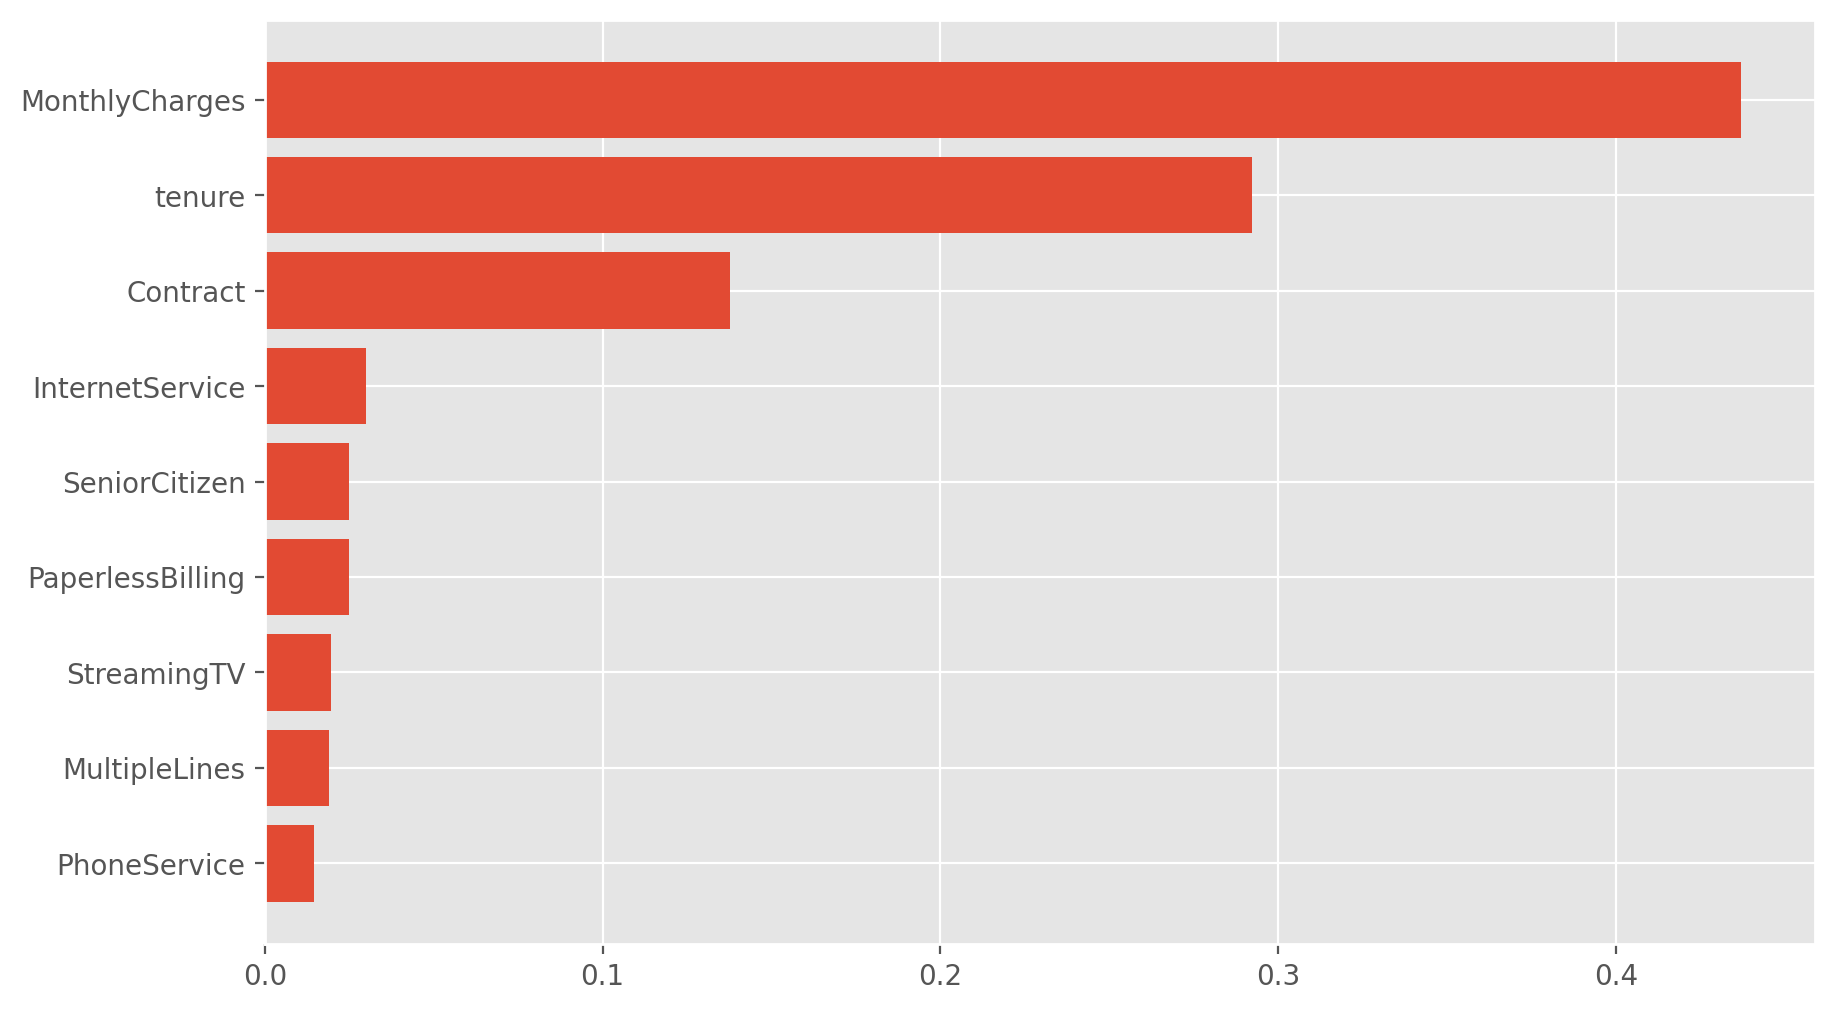

In [47]:
# Plotting the top important features
plt.barh(feat_imp_df['feature'][-10:],feat_imp_df['feature_importance'][-10:])

As we can see in the graph, the feature importance is distributed across features, which is a good indicator beacuse at least it is not overfitting to a specific feature. **The most relevant features being Monthly Charges (0.43), tenure (0.30) and contract (0.14).**

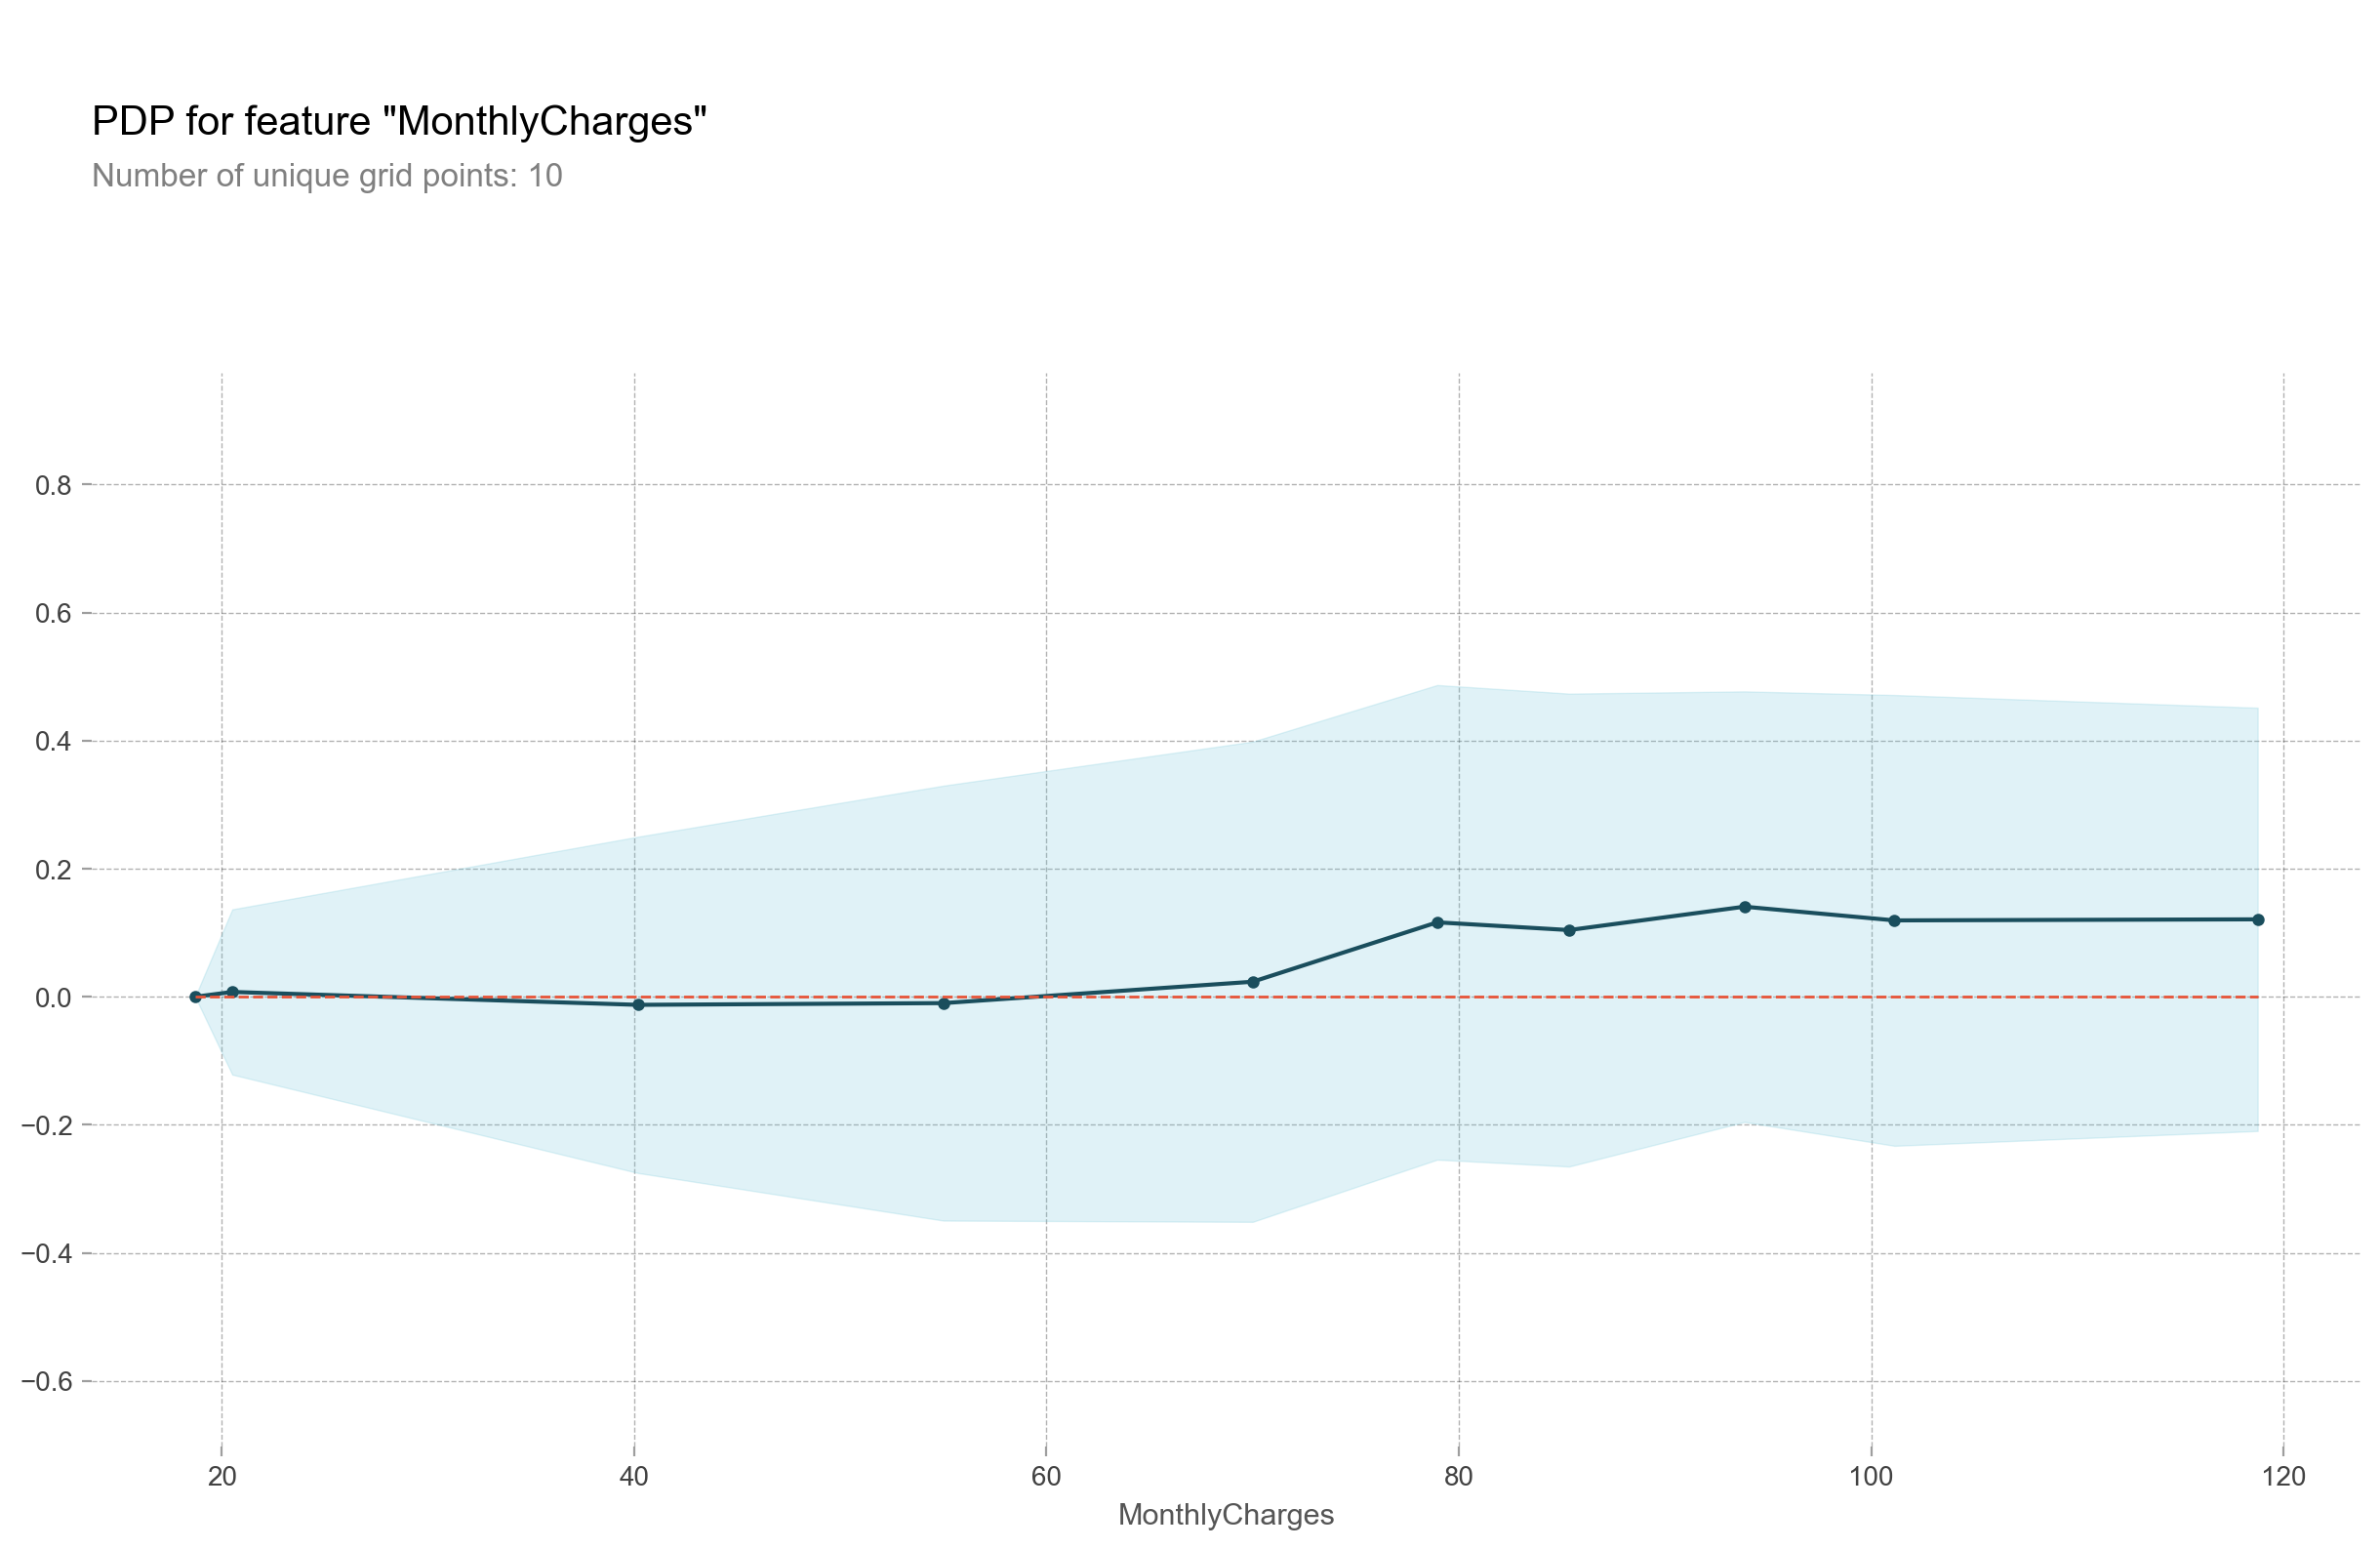

In [48]:
#Plotting Partial Dependence Plot for "Monthly Charges"

from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

feature_names = X_test.columns.tolist()
# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=my_model, dataset=X_test, model_features=feature_names, feature='MonthlyCharges')

# plot it
pdp.pdp_plot(pdp_goals, 'MonthlyCharges')
plt.show()

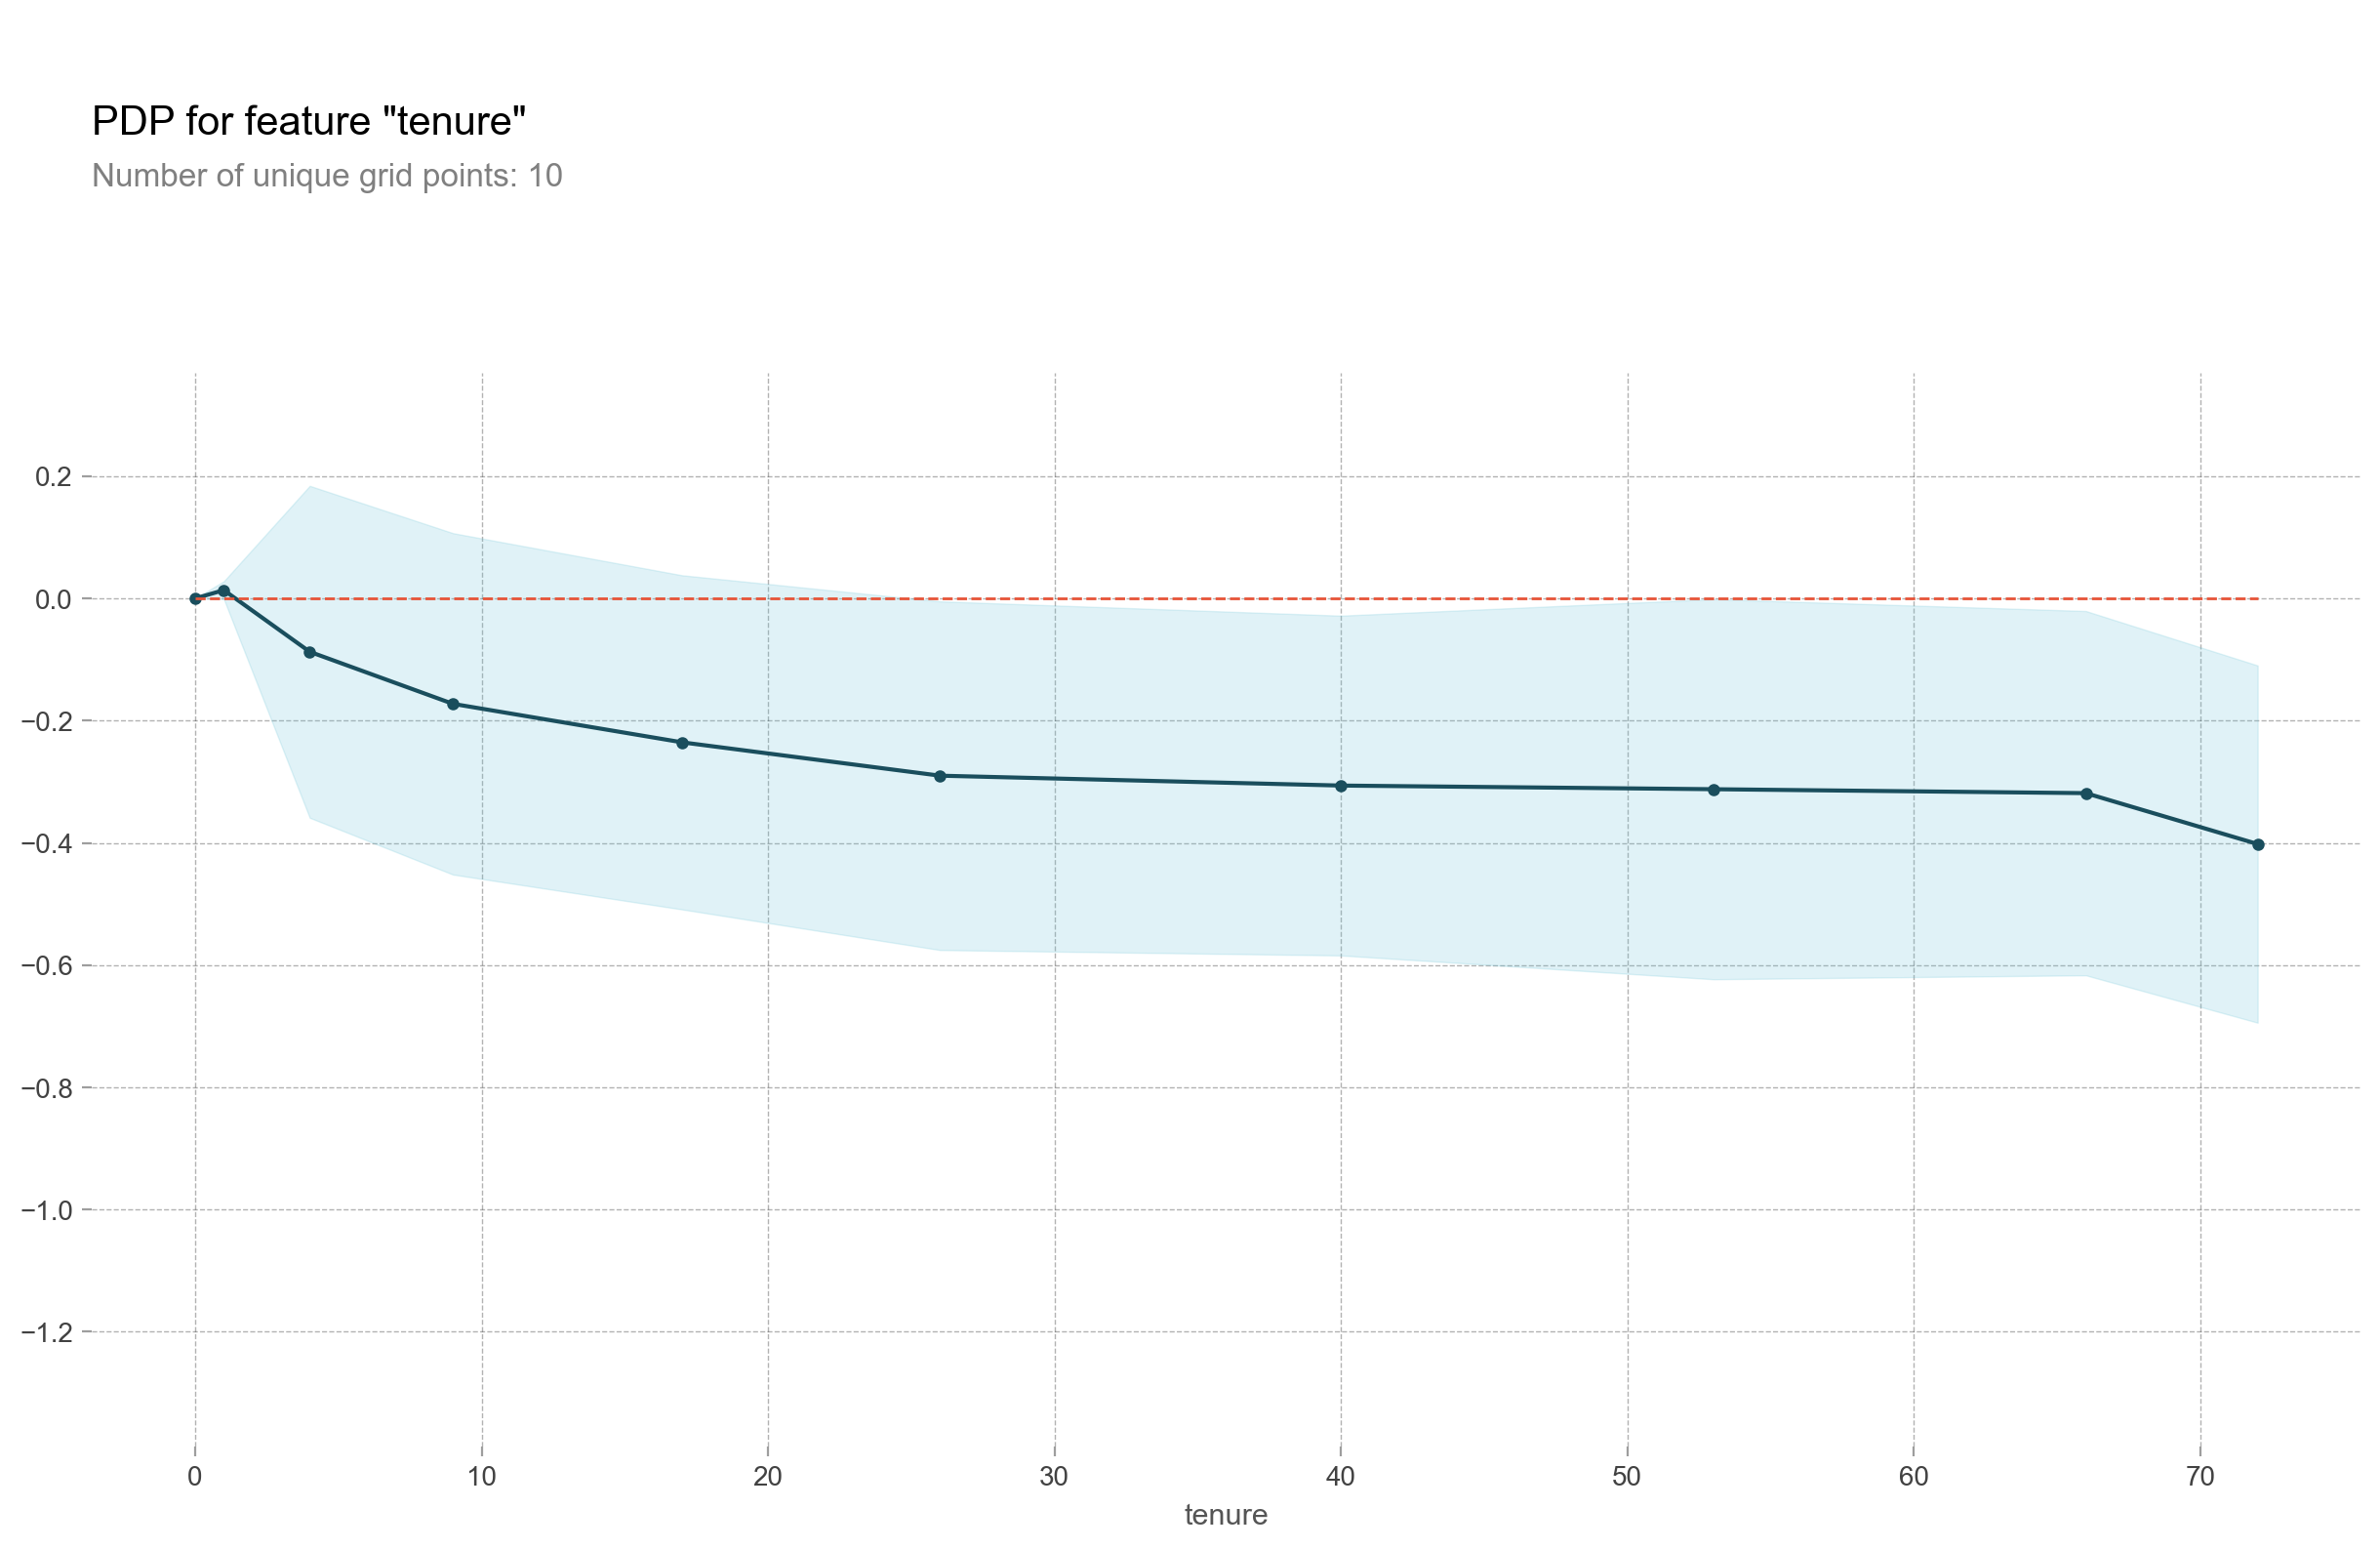

In [49]:
#Plotting Partial Dependence Plot for "tenure" for comparison purposes

from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

feature_names = X_test.columns.tolist()
# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=my_model, dataset=X_test, model_features=feature_names, feature='tenure')

# plot it
pdp.pdp_plot(pdp_goals, 'tenure')
plt.show()

It is interesting to see that in the case of the feature **"Monthly Charges" it mostly have a positive effect on the target variable while the "Tenure" feature has a negative effect**. Which means that the longer the customers have stayed in the company the less likely it will churn.

In [50]:
# Here we can just group the dataset and plot the trend
all_train = pd.concat([X_train, y_train], axis=1)

grouped_df_time_hosp = all_train.groupby(['tenure']).agg({'churn_3_month' : 'mean',
                                                                    'Contract': 'count'}).reset_index()
grouped_df_time_hosp.rename(columns = {'Contract': 'num_clients'}, inplace = True)
grouped_df_num_inpat = all_train.groupby(['MonthlyCharges']).agg({'churn_3_month' : 'mean',
                                                                    'Contract': 'count'}).reset_index()
grouped_df_num_inpat.rename(columns = {'Contract': 'num_clients'}, inplace = True)

grouped_df_num_inpat

,MonthlyCharges,churn_3_month,num_clients
0,18.25,0.666667,3
1,18.40,0.000000,1
2,18.55,0.000000,1
3,18.70,0.000000,1
4,18.75,0.000000,1
...,...,...,...
1476,117.60,0.000000,1
1477,117.80,1.000000,2
1478,118.35,1.000000,1
1479,118.60,0.000000,2


Im not including the plot of the results because it was not useful at all, and just provided confusion because of the different metrics values 

## SHAP Values

In [51]:
#Analyzing the 3 first customers

sample_data_for_prediction = X_test.iloc[37:40].astype(float)  

# let's predict the probability to see propensity of being in class 0 or 1 of each instance
my_model.predict_proba(sample_data_for_prediction)

array([[0.91, 0.09],
       [0.86, 0.14],
       [0.08, 0.92]])

### Force Plots

In [52]:
# we can calculate the force plot for the SHAP values
import shap  # package used to calculate Shap values
                                    

# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)
shap_values = explainer.shap_values(sample_data_for_prediction)
shap.initjs()

# first customer (index = 0)
shap.force_plot(explainer.expected_value[1], shap_values[1][0], sample_data_for_prediction.iloc[0])

In [53]:
# second customers (index = 1)
shap.force_plot(explainer.expected_value[1], shap_values[1][1], sample_data_for_prediction.iloc[1])

In [54]:
# third customer (index = 2)
shap.force_plot(explainer.expected_value[1], shap_values[1][2], sample_data_for_prediction.iloc[2])

In [55]:
df_shap = pd.DataFrame(shap_values[1])
df_shap.columns = sample_data_for_prediction.columns

[]

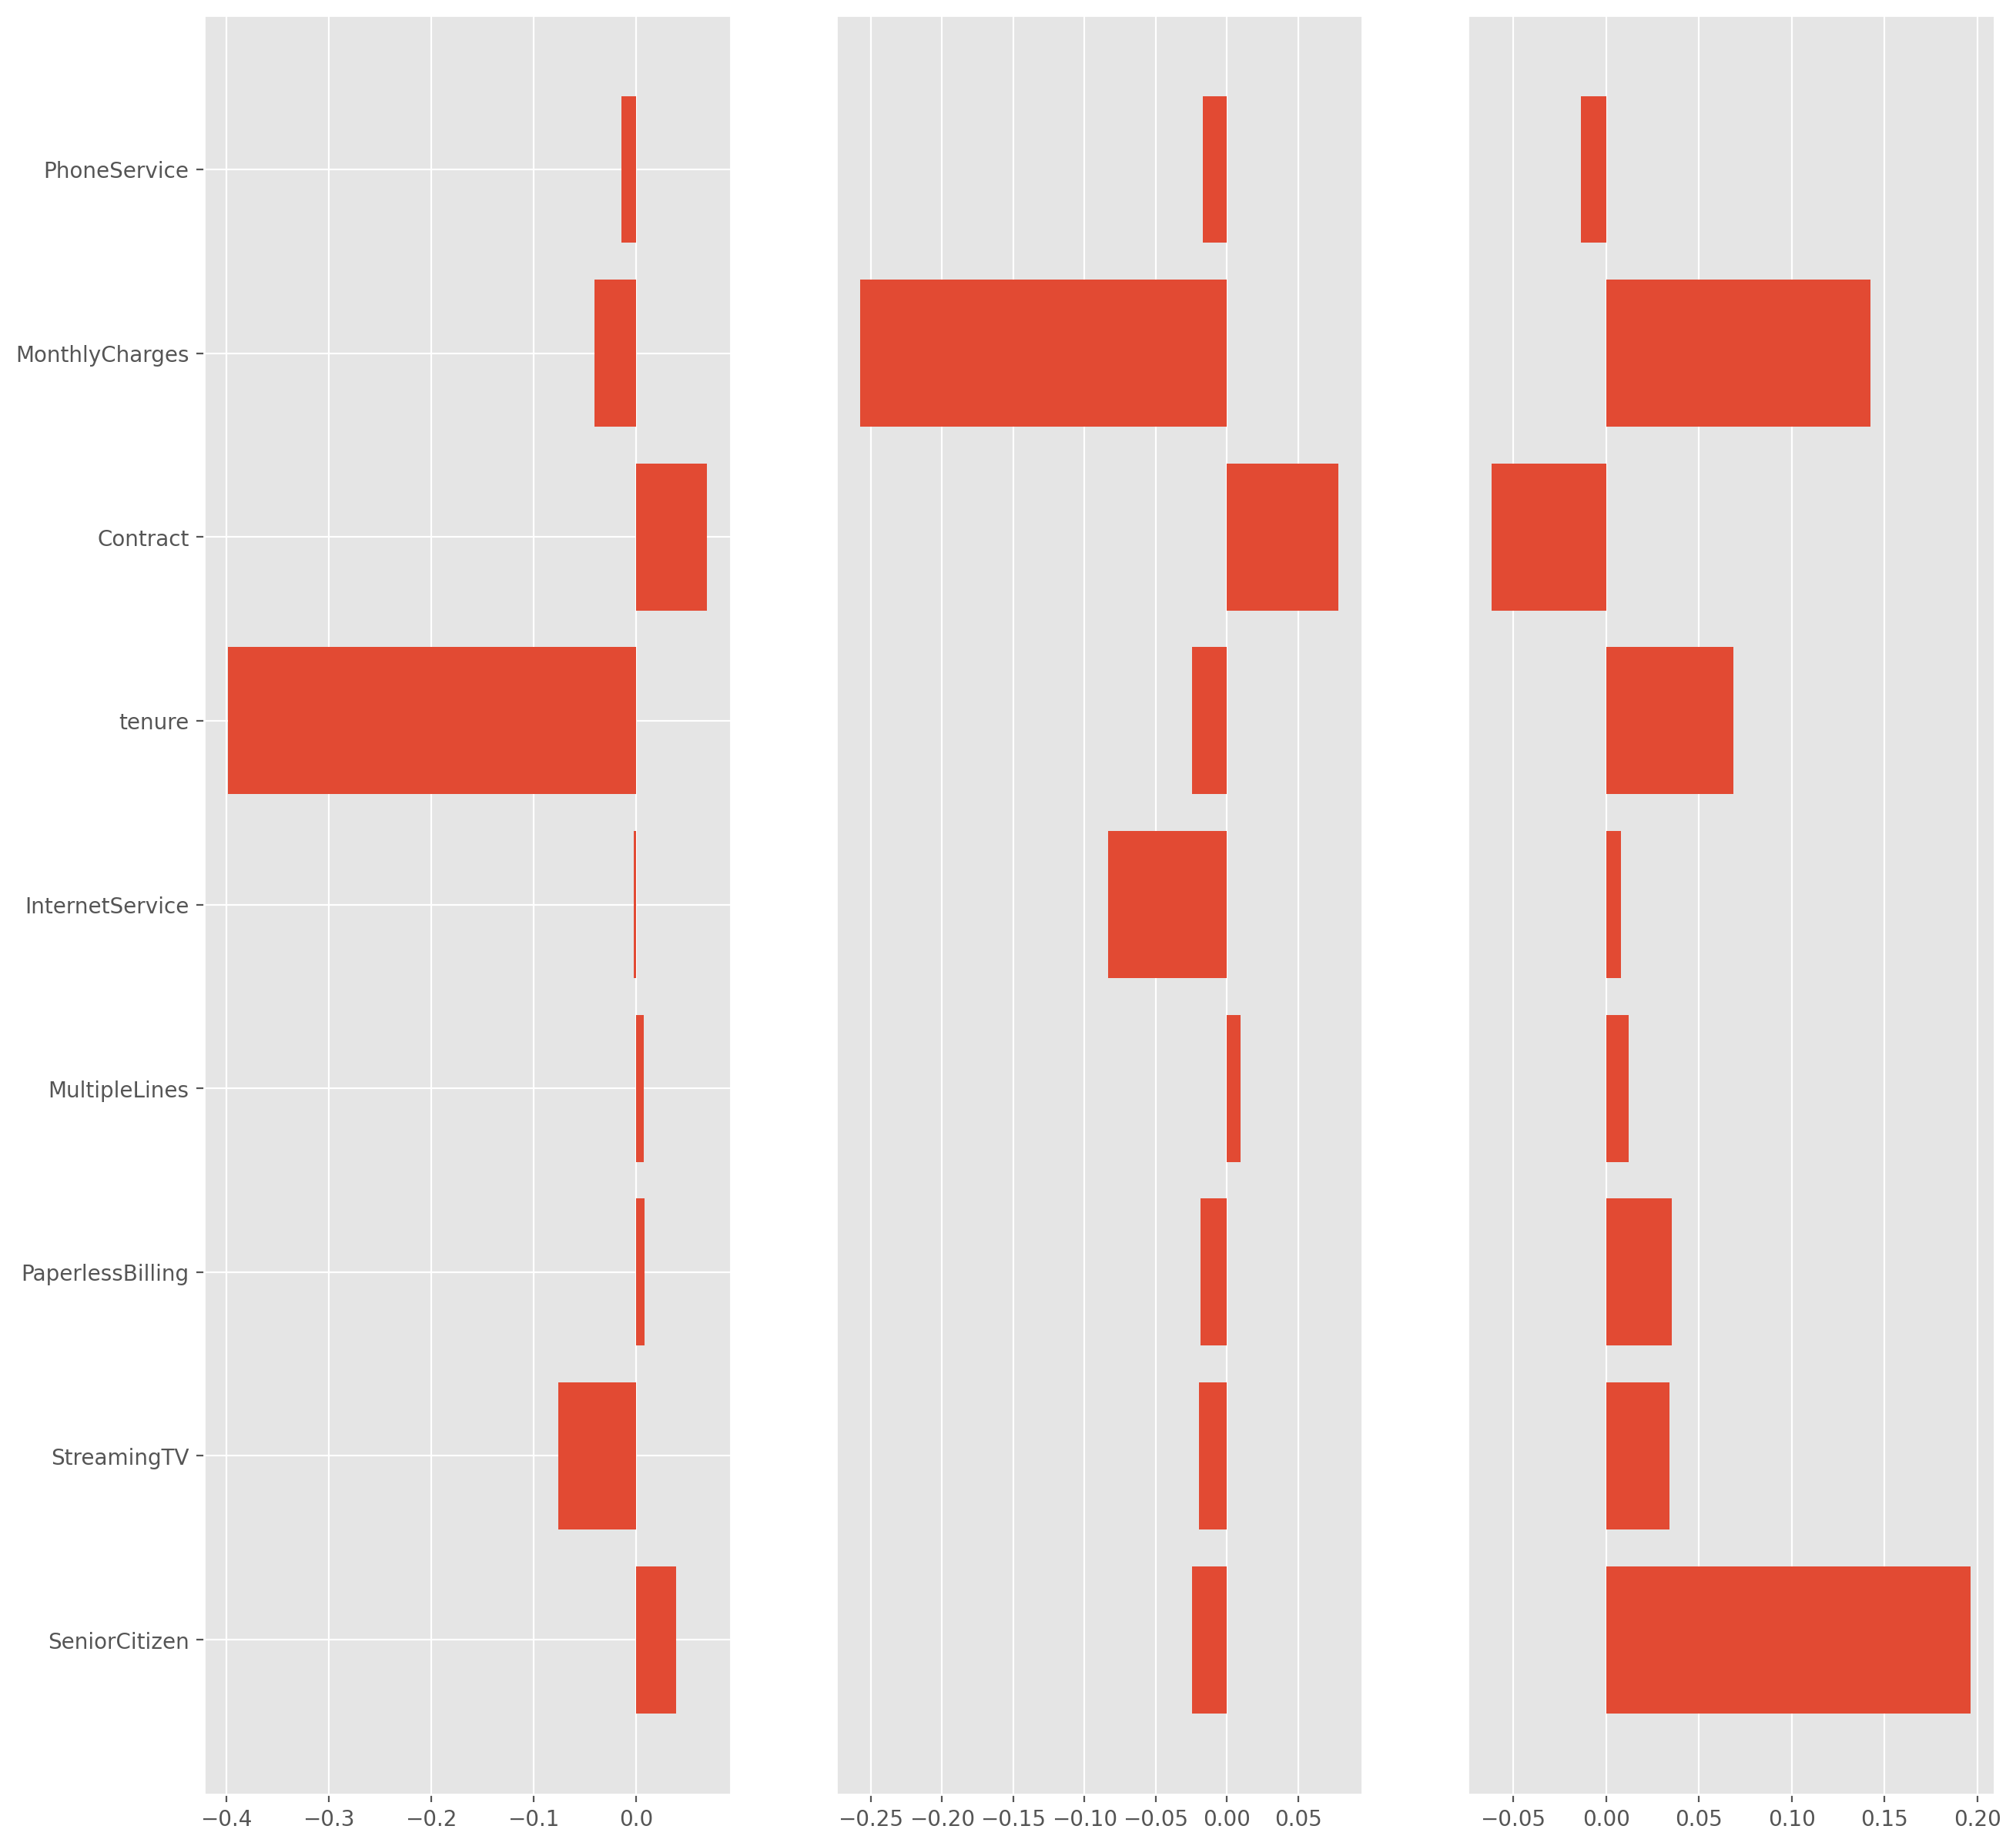

In [56]:
# Create a chart to visualize shap values for the first three patients
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 15))
b1 = ax1.barh(df_shap.columns, df_shap.iloc[0])
b2 = ax2.barh(df_shap.columns, df_shap.iloc[1])
ax2.set_yticks([])
b3 = ax3.barh(df_shap.columns, df_shap.iloc[2])
ax3.set_yticks([])

In [57]:
sample_data_for_prediction

,SeniorCitizen,StreamingTV,PaperlessBilling,MultipleLines,InternetService,tenure,Contract,MonthlyCharges,PhoneService
1499,1.0,0.0,1.0,1.0,1.0,64.0,0.0,94.25,1.0
6743,0.0,0.0,1.0,1.0,0.0,10.0,0.0,24.00,1.0
5229,1.0,1.0,1.0,1.0,1.0,43.0,1.0,107.55,1.0


From both the force plot and bar plot we can observe the local detail of SHAP values and how they contribute to the predictions, in our case, if the customer will churn or not.

In general, we see that the **results are aligned  with what we have seen at global level** (the top features are Monthly Charges, tenure and contract).

For example, we see that **specially the Monthly Charges and the tenure** are also important at local level (in both the force plot and bar plot we can see that they are important in pushig the prediction towards positive or negative values).

Also, it was **interesting to see that in the specific case of customer 2, the variable Internet Service had also a high impact on pushing the prediction towards the negative**. (We had identified that variable as the 4th more important).WHile we can see that the **tenure was less important in this specific case.**

Finally, **as a general conclusion**, in order to select the customers that we want to contact to try to avoid them to churn, **we should focus on the variables that have been highlighted as the most important** (Monthly Charges, Tenure and Contract).

I would say that **specially the type of contract (month to month, one year or two years)** is specially relevant as maybe its **easier for a customer to churn if he/she has month to month payments** than if he/she has one year or two years contracts. But this is just a personal opinion. 

**Tenure** also appeared to be very important, so **if the customer have already stayed a long time with the company, I would not waste budged in calling** them because his churning probability should be smaller.